# **Marketing Campaign Customer Classification**

Ronaldlee Ejalu and Chelsea Ko  
DSC 540 ML Project  
Winter 2022  

# Executive Summary
Our project sought to classify customers into those who would or would not accept the marketing campaign. Identifying customers who are more likely to accept the campaign will assist companies in using their marketing resources more effectively. The original dataset included 2,240 observations and 29 columns.

We conducted data exploration, data visualization, and preprocessing to clean the data, including examining and addressing missing values and outliers.

We used three versions of the dataset in our analysis, including:
1. A standardized dataset.
2. A standardized dataset that used Synthetic Minority Oversampling Technique (SMOTE) and Random Undersampling to address class imbalance.
3. A standardized principal component analysis dataset using the top 15 components that accounted for 90% of the variance. 

For each of the datasets, we used the following classifiers and compared their base model performance to their performance using the best parameters identified using GridSearchCV. 
* Logistic Regression
* Support Vector Machines
* KNN
* Decision Tree
* Random Forest
* Adaboost
* Gradient Boosting

We used the following evaluation metrics:
* Training accuracy
* Validation accuracy
* Recall
* Specificity
* Precision
* Balanced Accuracy
* F1 score
* Difference between training and validation accuracy
* Profit

The dataset indicated that each contact cost the company \$3, and each campaign acceptance produced a revenue of \$11. Using this data, we calculated the following profit evaluation metric:  

Profit = (True positives x \$11 revenue) - (False positives x \$3 cost) - (False negatives x \$11 lost revenue)

We balanced these metrics to determine our two best models. We then evaluated the two best models on the set aside test dataset. Our results indicated the **RandomForest Classifier** produced the best overall metrics, including the highest profit score.

# Introduction

## Source of the data:
https://www.kaggle.com/rodsaldanha/arketing-campaign

## Variable description

ID - customer ID  
Year_Birth - customer birth year  
Education - customer’s level of education  
Marital_Status - customer’s marital status  
Income - customer’s yearly household income  
Kidhome - number of small children in customer’s household  
Teenhome - number of teenagers in customer’s household  
Dt_Customer - date of customer’s enrolment with the company  
Recency - number of days since the last purchase  
  
MntWines - amount spent on wine products in the last 2 years  
MntFruits - amount spent on fruits products in the last 2 years  
MntMeatProducts - amount spent on meat products in the last 2 years  
MntFishProducts - amount spent on fish products in the last 2 years  
MntSweetProducts - amount spent on sweet products in the last 2 years  
MntGoldProds - amount spent on gold products in the last 2 years  
  
NumDealsPurchases - number of purchases made with discount  
NumCatalogPurchases - number of purchases made using catalogue  
NumStorePurchases - number of purchases made directly in stores  
NumWebPurchases - number of purchases made through company’s web site  
NumWebVisitsMonth - number of visits to company’s web site in the last month  
  
AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise  
AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  
AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  
AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise  
AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise  
Complain - 1 if customer complained in the last 2 years  
Z_CostContact - cost to contact a customer (\$3)  
Z_revenue - revenue after client accepting campaign (\$11)   
  
Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise  


## Load necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

## Load the data

In [2]:
# Code to access datasets in same Google Drive folder
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
%ls -l

total 8
drwx------ 13 root root 4096 Mar 14 01:01 MyDrive/
drwx------  2 root root 4096 Mar 14 01:01 Shareddrives/


In [5]:
#marketingdata = pd.read_csv('marketing_campaign.csv', sep=';')
#marketingdata.head() # top five records

# Load the data into a Pandas dataframe
%cd MyDrive/

# Chelsea path
# copied_path = '/gdrive/MyDrive/DSC540_Project/marketing_campaign.csv'

# Ronaldlee path
copied_path = '/gdrive/.shortcut-targets-by-id/11XRz1on3BinQneHRGDYlLHRG46LSWpcx/DSC540_Project/marketing_campaign.csv'

marketingdata = pd.read_csv(copied_path, sep=';')
marketingdata.head()

/gdrive/MyDrive


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [6]:
# Examine the structure of the data frame including its meta data
marketingdata.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
marketingdata.tail() # the last five records

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [8]:
marketingdata.shape

(2240, 29)

<p>We have 2240 observations with 29 columns/features. Two features are categorical (Education and Marital Status), one feature is a date (Dt_Customer) and the remaining 26 columns are numeric, including the numeric ID (index) variable.</p>

# Exploratory Data Analysis

## Examine and address missing values

In [9]:
# Check for any missing values
marketingdata.isnull().values.any()

True

Identify which columns have missing values and number of missing values.

In [10]:
# Detect the number of missing values in the data set
marketingdata.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [11]:
# Get index values for missing income rows
missingIndex = marketingdata[marketingdata['Income'].isnull()].index.tolist()
print(missingIndex)

[10, 27, 43, 48, 58, 71, 90, 91, 92, 128, 133, 312, 319, 1379, 1382, 1383, 1386, 2059, 2061, 2078, 2079, 2081, 2084, 2228]


In [12]:
# Address missing income values using scikit-learn's iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [13]:
# Create numeric dataset
mdNumeric = marketingdata.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue', 'Education', 'Marital_Status', 'Dt_Customer'])
mdNumeric.shape

(2240, 23)

In [14]:
# Save column names
cols = mdNumeric.columns
print(cols)

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')


In [15]:
# Initialize iterative imputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(mdNumeric)

IterativeImputer(random_state=0)

In [16]:
filled = imp.transform(mdNumeric)  # Transform missing
filled = pd.DataFrame(filled)      # Convert to dataframe
filled.columns = cols              # Add column names
filled.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1954.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1965.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1984.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1981.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Replace original Income column with filled income column
marketingdata['Income'] = filled['Income']
marketingdata['Income'].describe()

count      2240.000000
mean      52232.041383
std       25103.854720
min        1730.000000
25%       35233.500000
50%       51301.000000
75%       68468.250000
max      666666.000000
Name: Income, dtype: float64

In [18]:
# Check whether any NA values remain.
marketingdata.isnull().values.any()

False

Our dataset had one column (Income) that had 24 missing values. We used scikit learn's Iterative Imputer to fill in those missing values by analyzing the remaining variable's numeric values.

## Descriptive statistics

In [19]:
marketingdata.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2240.0,52232.041383,25103.854720,1730.0,35233.50,51301.0,68468.25,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [20]:
# Identify the unique values of each column in our dataframe
dfColumns = []
for i in marketingdata.columns:
    dfColumns.append([i, marketingdata[i].nunique(), marketingdata[i].drop_duplicates().values])
pd.DataFrame(dfColumns, columns = ['Features', 'Unique Number', 'Values'])

,Features,Unique Number,Values
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177..."
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 198..."
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, A..."
4,Income,1998,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ..."
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[2012-09-04, 2014-03-08, 2013-08-21, 2014-02-1..."
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 8..."
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6..."


<p>Here, we have the number of unique values per variable.</p>

## Data Visualization

In [21]:
# Frequency counts for categorical/discrete variables

print(marketingdata['Education'].value_counts())

print(marketingdata['Marital_Status'].value_counts())

print(marketingdata['Kidhome'].value_counts())

print(marketingdata['Teenhome'].value_counts())

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
0    1293
1     899
2      48
Name: Kidhome, dtype: int64
0    1158
1    1030
2      52
Name: Teenhome, dtype: int64


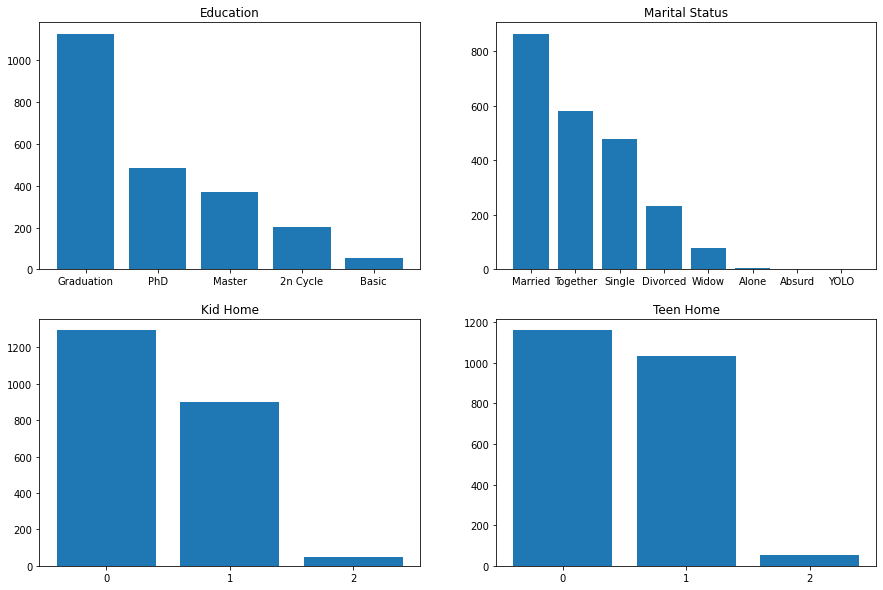

In [22]:
# Bar charts for categorical/discrete variables

plt.figure(figsize=(15, 10))

# Education
ed = ['Graduation', 'PhD', 'Master', '2n Cycle', 'Basic']
edvals = [1127, 486, 370, 203, 54]
plt.subplot(2,2,1)
plt.bar(ed, edvals)
plt.title('Education')

# Marital status
ms = ['Married', 'Together', 'Single','Divorced','Widow', 'Alone','Absurd','YOLO']
msvals = [864, 580, 480, 232, 77, 3, 2, 2]
plt.subplot(2,2,2)
plt.bar(ms, msvals)
plt.title('Marital Status')

# Kid home
ms = ['0', '1', '2']
msvals = [1293, 899, 48]
plt.subplot(2,2,3)
plt.bar(ms, msvals)
plt.title('Kid Home')

# Teen home
ms = ['0', '1', '2']
msvals = [1158, 1030, 52]
plt.subplot(2,2,4)
plt.bar(ms, msvals)
plt.title('Teen Home')


plt.show()

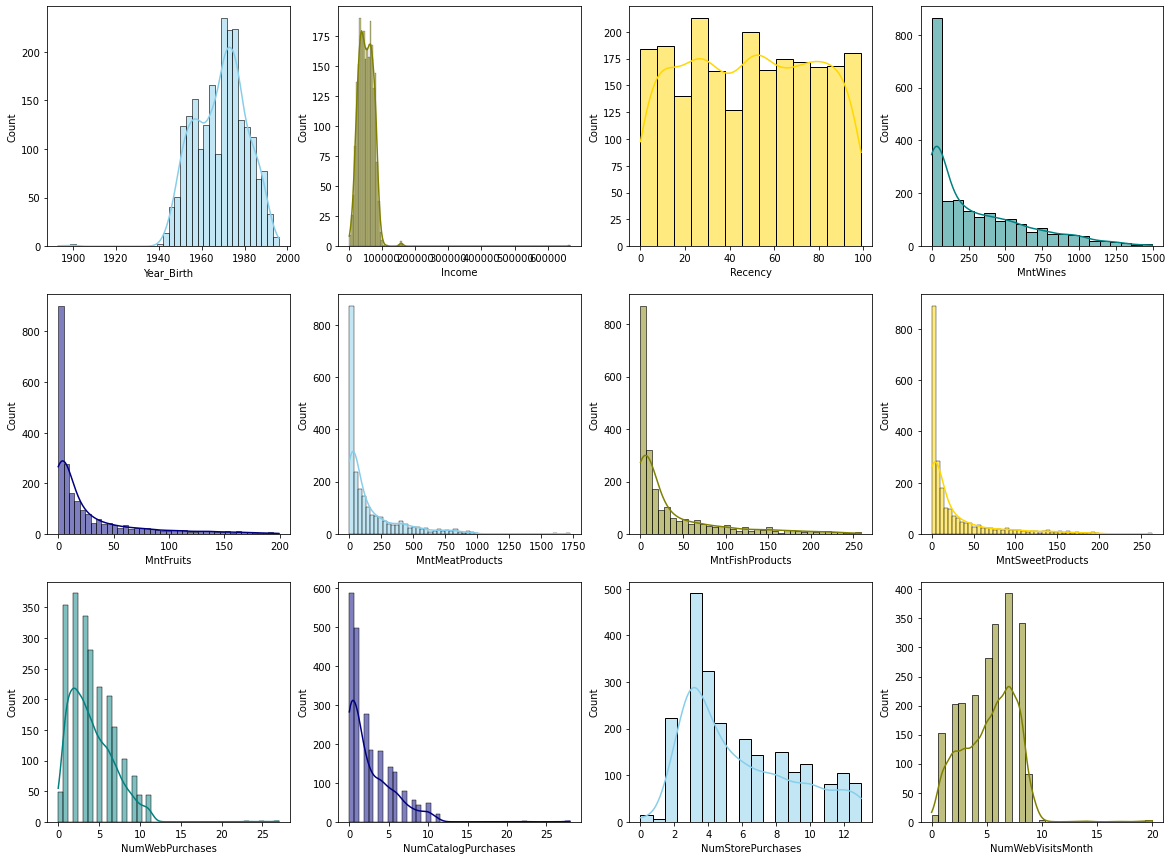

In [23]:
# Histograms for Year_Birth, Income, Recency, MntWines, MntFruits, 
# MntMeatProducts, MntFishProducts, MntSweetProducts
# NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth

fig, axs = plt.subplots(3, 4, figsize=(20, 15))

sns.histplot(data=marketingdata, x="Year_Birth", kde=True, color="skyblue", ax=axs[0,0])
sns.histplot(data=marketingdata, x="Income", kde=True, color="olive", ax=axs[0,1])
sns.histplot(data=marketingdata, x="Recency", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=marketingdata, x="MntWines", kde=True, color='teal', ax=axs[0, 3])

sns.histplot(data=marketingdata, x="MntFruits", kde=True, color='navy', ax=axs[1, 0])
sns.histplot(data=marketingdata, x="MntMeatProducts", kde=True, color='skyblue', ax=axs[1, 1])
sns.histplot(data=marketingdata, x="MntFishProducts", kde=True, color='olive', ax=axs[1, 2])
sns.histplot(data=marketingdata, x="MntSweetProducts", kde=True, color='gold', ax=axs[1, 3])

sns.histplot(data=marketingdata, x="NumWebPurchases", kde=True, color='teal', ax=axs[2, 0])
sns.histplot(data=marketingdata, x="NumCatalogPurchases", kde=True, color='navy', ax=axs[2, 1])
sns.histplot(data=marketingdata, x="NumStorePurchases", kde=True, color='skyblue', ax=axs[2, 2])
sns.histplot(data=marketingdata, x="NumWebVisitsMonth", kde=True, color='olive', ax=axs[2, 3])

plt.show()

The bar plots above show that most customers achieved "Graduation" level of education, which is equivalent to high school graduation. The top two categories of marital status are "Married" and "Together" indicating most customers are coupled. Furthermore, more than half of customers have 0 children or teens at home, and the next highest frequency is 1.

The histograms show that year_birth is approximately normally distributed. Income is also somewhat normally distributed, but right skewed due to outliers on the high end. The recency variable has an approximately uniform distribution, which is expected assuming that the customers were last contacted on a uniform/regular basis. The amount of wines, fruits, meat products, fish products, and sweet produces purchased are heavily right skewed. The number of web, catalog, and store purchases are somewhat right skewed, and the distribution of the number of web vists per month is somewhat left skewed.

In [24]:
# Create numeric dataset for predictor variables
mdNumeric = marketingdata.drop(columns=['Education', 'Marital_Status', 'Dt_Customer'])
mdNumeric.shape

(2240, 26)

In [25]:
# rounding off to two decimal places
cors = mdNumeric.corr().round(2)
cors

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.00,0.00,0.01,0.00,-0.00,-0.05,-0.02,0.00,-0.00,-0.02,-0.01,-0.01,-0.04,-0.02,-0.00,-0.01,-0.01,-0.04,-0.03,-0.01,-0.02,-0.02,0.03,NaN,NaN,-0.02
Year_Birth,0.00,1.00,-0.16,0.23,-0.35,-0.02,-0.16,-0.02,-0.03,-0.04,-0.02,-0.06,-0.06,-0.15,-0.12,-0.13,0.12,0.06,-0.06,0.01,-0.01,-0.01,-0.03,NaN,NaN,0.02
Income,0.01,-0.16,1.00,-0.43,0.02,-0.00,0.58,0.43,0.58,0.44,0.44,0.33,-0.08,0.39,0.59,0.53,-0.55,-0.02,0.19,0.34,0.28,0.09,-0.03,NaN,NaN,0.13
Kidhome,0.00,0.23,-0.43,1.00,-0.04,0.01,-0.50,-0.37,-0.44,-0.39,-0.37,-0.35,0.22,-0.36,-0.50,-0.50,0.45,0.01,-0.16,-0.21,-0.17,-0.08,0.04,NaN,NaN,-0.08
Teenhome,-0.00,-0.35,0.02,-0.04,1.00,0.02,0.00,-0.18,-0.26,-0.20,-0.16,-0.02,0.39,0.16,-0.11,0.05,0.13,-0.04,0.04,-0.19,-0.14,-0.02,0.00,NaN,NaN,-0.15
Recency,-0.05,-0.02,-0.00,0.01,0.02,1.00,0.02,-0.00,0.02,0.00,0.02,0.02,-0.00,-0.01,0.03,0.00,-0.02,-0.03,0.02,0.00,-0.02,-0.00,0.01,NaN,NaN,-0.20
MntWines,-0.02,-0.16,0.58,-0.50,0.00,0.02,1.00,0.39,0.56,0.40,0.39,0.39,0.01,0.54,0.64,0.64,-0.32,0.06,0.37,0.47,0.35,0.21,-0.04,NaN,NaN,0.25
MntFruits,0.00,-0.02,0.43,-0.37,-0.18,-0.00,0.39,1.00,0.54,0.59,0.57,0.39,-0.13,0.30,0.49,0.46,-0.42,0.01,0.01,0.22,0.19,-0.01,-0.01,NaN,NaN,0.13
MntMeatProducts,-0.00,-0.03,0.58,-0.44,-0.26,0.02,0.56,0.54,1.00,0.57,0.52,0.35,-0.12,0.29,0.72,0.48,-0.54,0.02,0.10,0.37,0.31,0.04,-0.02,NaN,NaN,0.24
MntFishProducts,-0.02,-0.04,0.44,-0.39,-0.20,0.00,0.40,0.59,0.57,1.00,0.58,0.42,-0.14,0.29,0.53,0.46,-0.45,0.00,0.02,0.20,0.26,0.00,-0.02,NaN,NaN,0.11


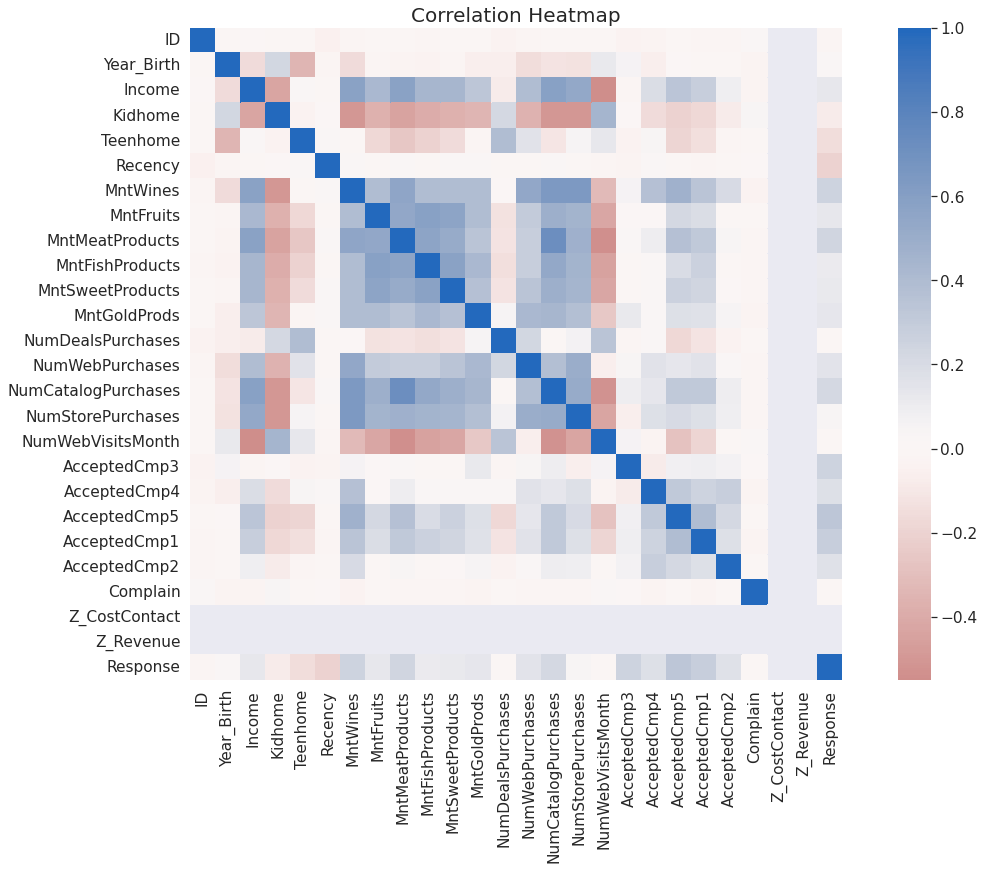

In [26]:
# Create a correlation heatmap
sns.set(rc = {'figure.figsize':(20,12)}, font_scale=1.4)  # Set figure size and font size
sns.heatmap(cors, annot_kws={'size':8}, cmap="vlag_r", center=0, cbar=True, square=True, fmt='.2f')  # Creates a correlation heatmap using seaborn
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

The correlation heatmap indicates the amounts spent on wines, fruits, meat products, fish products, sweet products, and gold products are positively correlated with each other. It appears having a child at home is negatively correlated with amount spent on products purchased and the number of web, catalogue, and store purchases, but is positively correlated with number of web visits per month and number of purchases made using deals. Another interesting note is that income is positively correlated with amount of products purchased and number of web, catalog, and store purchases, but is negatively correlated with number of web visits per month.

## Address Income outlier

In [27]:
# Remove income outlier, which is over four times as large as the next largest value (162,397).
marketingdata.drop(marketingdata.index[marketingdata['Income'] == 666666], inplace=True)

In [28]:
marketingdata['Income'].describe().T

count      2239.000000
mean      51957.617998
std       21487.656544
min        1730.000000
25%       35221.000000
50%       51287.000000
75%       68429.500000
max      162397.000000
Name: Income, dtype: float64

## Examine response variable and predictor frequency by response

In [29]:
# Replace the values of 0 and 1 in the data set
marketingdata.loc[marketingdata['Response'] == 1, 'Response'] = 'Yes'
marketingdata.loc[marketingdata['Response'] == 0, 'Response'] = 'No'

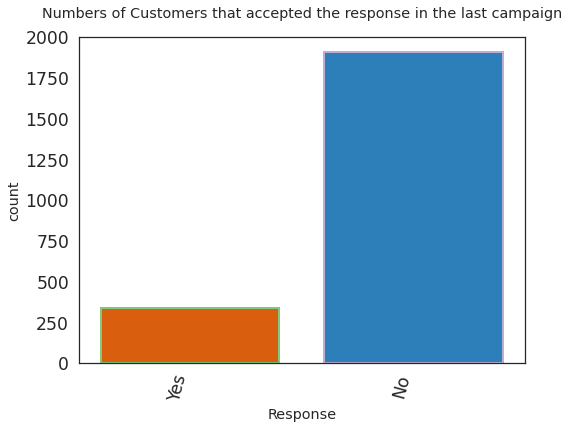

In [30]:
figx = plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) # set the font size
sns.set_style('white') # show white grids

ax = sns.countplot(data=marketingdata
             , x='Response'
             #, hue='Education'
             , saturation=1

             , palette= ['#d95f0e', '#2c7fb8']
             , linewidth=2
             , edgecolor=sns.color_palette("Accent", 2)
            )
# rotate the label text for the x-axis to 75 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, horizontalalignment='right', fontsize='large')
plt.yticks(fontsize='large')

# set the title of the chat
plt.title('Numbers of Customers that accepted the response in the last campaign', y=1.04)
plt.show()

In [31]:
marketingdata['Response'].value_counts()

No     1905
Yes     334
Name: Response, dtype: int64

334 out of 2240 customers accepted the response, indicating that our project will have to address the problem of class imbalance.

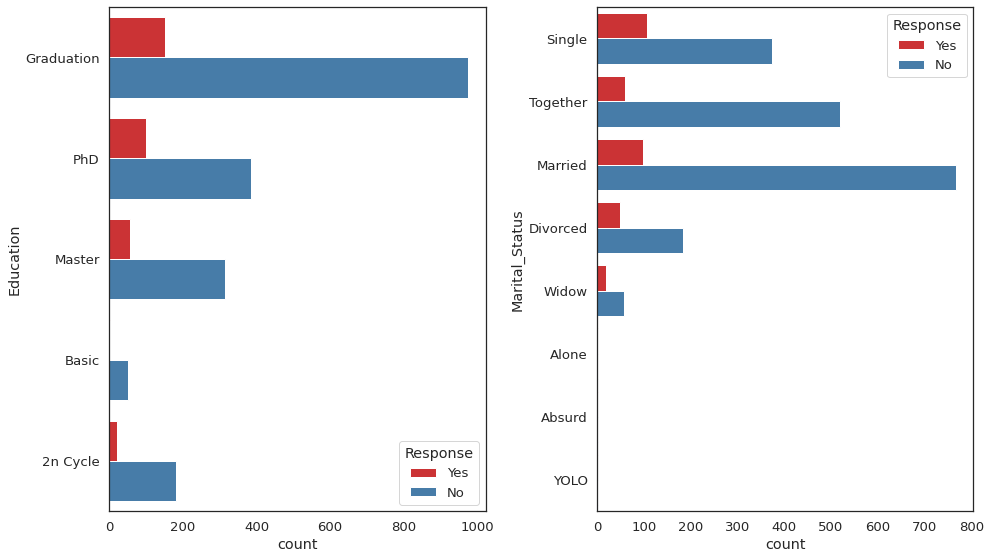

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8))
flatten_axes = axes.flatten()

# loop through the elements of the education and MaritalStatus variables
for ax, col in zip(flatten_axes, ['Education', 'Marital_Status']):
  sns.countplot(y = col, hue='Response', data=marketingdata, ax=ax, palette='Set1')
plt.tight_layout()
plt.show()


The countplot charts above shows the number of customers who reponded to the campaign broken down by their education and marital status. The charts indicate a larger proportion of customers who finished high school responded "No" to the campaign, compared to those who obtained a higher level of education.  Furthermore, a greater proportion of single customers responded "Yes" to the campaign, compared to those who were married or together.

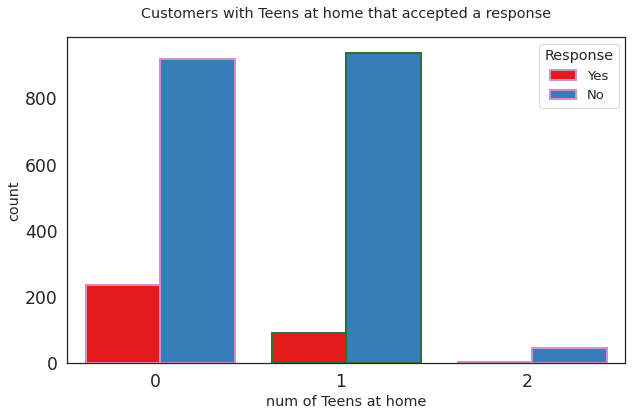

In [33]:
figx = plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2) # set the font size
sns.set_style('white') # show white grids

ax = sns.countplot(data=marketingdata
             , x='Teenhome'
             , hue='Response'
             , saturation=1

             , palette= 'Set1'
             , linewidth=2
             , edgecolor=sns.color_palette("cubehelix_r", 2)
            )
# rotate the label text for the x-axis to 75 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right', fontsize='large')
ax.set_xlabel('num of Teens at home')
plt.yticks(fontsize='large')

# set the title of the chat
plt.title('Customers with Teens at home that accepted a response', y=1.04)
plt.show()

The above bar chart indicates those with zero teens at home were more likely to accept the campaign compared to those with one or two teens at home.

## Feature engineering/reduction

In [34]:
# Drop ID (index), Z_CostContact, Z_Revenue (values the same for all rows)
marketingdata.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'], inplace=True)
marketingdata.shape

(2239, 26)

In [35]:
# Marital/Relationship Status
marketingdata['Marital_Status'].value_counts()

Married     864
Together    579
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

We created a new variable, "RelStatus", that combined marital status into two groups, "Single" and "Coupled". The original marital status variable had eight categories with a total of seven customers between the "YOLO", "Absurd" and "Alone" categories. "Alone", "Widow" and "Divorced" were combined into "Single". "Together" and "Married" were combined into "Coupled". We removed the customers whose relationship statuses were "Absurd" and "YOLO" because we are unable to determine their relationship status.

In [36]:
marketingdata.loc[marketingdata['Marital_Status'] == 'Single', 'RelStatus'] = 'Single'
marketingdata.loc[marketingdata['Marital_Status'] == 'Widow', 'RelStatus'] = 'Single'
marketingdata.loc[marketingdata['Marital_Status'] == 'Alone', 'RelStatus'] = 'Single'
marketingdata.loc[marketingdata['Marital_Status'] == 'Divorced', 'RelStatus'] = 'Single'
marketingdata.loc[marketingdata['Marital_Status'] == 'Married', 'RelStatus'] = 'Coupled'
marketingdata.loc[marketingdata['Marital_Status'] == 'Together', 'RelStatus'] = 'Coupled'
marketingdata.loc[marketingdata['Marital_Status'] == 'YOLO', 'RelStatus'] = 'NaN'
marketingdata.loc[marketingdata['Marital_Status'] == 'Absurd', 'RelStatus'] = 'NaN'

In [37]:
marketingdata['RelStatus'].value_counts()

Coupled    1443
Single      792
NaN           4
Name: RelStatus, dtype: int64

In [38]:
# dropping NAN (YOLO and Absurd) records
marketingdata.drop(marketingdata[marketingdata['RelStatus'] == 'NaN'].index, inplace=True)

We engineered new features by combining features in the same category to examine whether these features are better at predicting our target variable.

In [39]:
# create AmountSpent, which is the summation of the amount of money spent on products by the customer.
marketingdata['amountSpent'] =  marketingdata['MntFishProducts'] + marketingdata['MntMeatProducts'] + marketingdata['MntFruits'] + marketingdata['MntSweetProducts'] + marketingdata['MntWines'] + marketingdata['MntGoldProds']

# Created numOfPurchases, which is a summation of purchases made from the catalogue, web or in-store
marketingdata['numOfPurchases'] = marketingdata['NumDealsPurchases'] + marketingdata['NumCatalogPurchases'] + marketingdata['NumStorePurchases'] + marketingdata['NumWebPurchases']

# Created numOfMinorsHome, which is a summation of Teenhome and KidHome
marketingdata['numOfMinorsHome'] =  marketingdata['Teenhome'] + marketingdata['Kidhome'] 

# Created prvAcceptedCampaigns, which is a summation of the previous campaigns a customer participated in. 
marketingdata['prvAcceptedCampaigns'] = marketingdata['AcceptedCmp1'] + marketingdata['AcceptedCmp2'] + marketingdata['AcceptedCmp3'] + marketingdata['AcceptedCmp4'] + marketingdata['AcceptedCmp5']

marketingdata['dateCust'] = pd.to_datetime(marketingdata['Dt_Customer'])

# Created custage, which is the age when the customer enrolled at our company. 
marketingdata['dateCustYear'] = pd.DatetimeIndex(pd.to_datetime(marketingdata['Dt_Customer'], format='%Y-%m-%d')).year

marketingdata['custAge'] = marketingdata['dateCustYear'] - marketingdata['Year_Birth']
# pd.DatetimeIndex(marketingdata['dateCust']).year - marketingdata['Year_Birth']


## Data visualization for new features/bivariate distributions

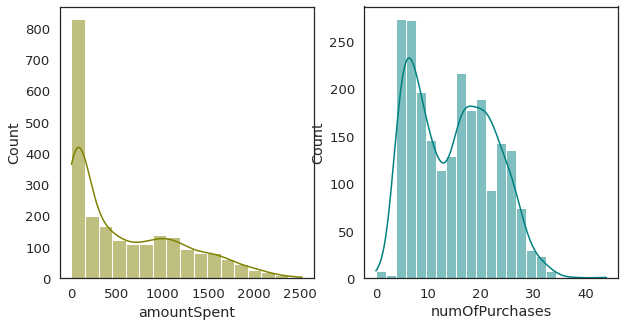

In [40]:
# Plot histograms for amountSpent and numOfPurchases

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(data=marketingdata, x="amountSpent", kde=True, color='olive', ax=axs[0])
sns.histplot(data=marketingdata, x="numOfPurchases", kde=True, color='teal', ax=axs[1])

plt.show()


In [41]:
print(marketingdata['prvAcceptedCampaigns'].value_counts())

print(marketingdata['numOfMinorsHome'].value_counts())

0    1773
1     325
2      82
3      44
4      11
Name: prvAcceptedCampaigns, dtype: int64
1    1125
0     636
2     421
3      53
Name: numOfMinorsHome, dtype: int64


Text(0.5, 1.0, 'Number of Minors at Home')

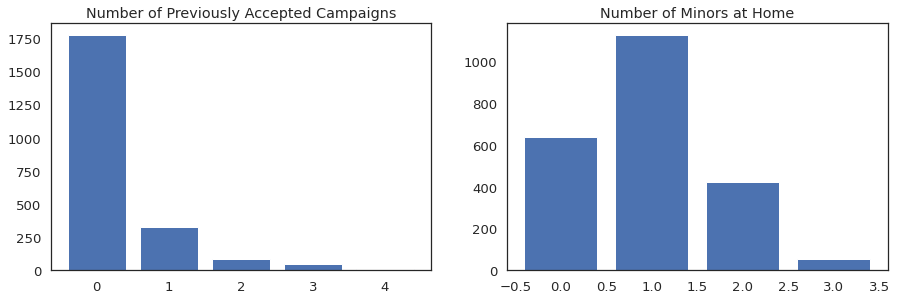

In [42]:
plt.figure(figsize=(15, 10))

# Previously Accepted Campaigns
cp = [0, 1, 2, 3, 4]
cpvals = [1773, 325, 82, 44, 11]
plt.subplot(2,2,1)
plt.bar(cp, cpvals)
plt.title('Number of Previously Accepted Campaigns')

# Number of Minors at Home
mh = [0, 1, 2, 3]
mhvals = [636, 1125, 421, 53]
plt.subplot(2,2,2)
plt.bar(mh, mhvals)
plt.title('Number of Minors at Home')

The distributions of the engineered features indicate that amount spent is heavily right skewed, number of purchases appears to be multi-modal and somewhat right skewed. Number of previously accepted campaigns is heavily right skewed, with most individuals accepting a total of zero campaigns. Finally, a majority of customers have one child or teen at home, with the next highest frequency being zero minors at home.

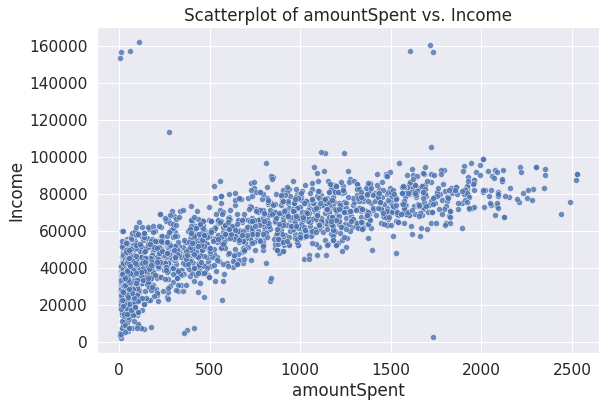

In [43]:
# Amount spent by Income
sns.set(rc = {'figure.figsize':(9,6)}, font_scale=1.4)
plt.title('Scatterplot of amountSpent vs. Income')
sns.scatterplot(x=marketingdata['amountSpent'], y=marketingdata['Income'], alpha=0.8)
plt.show()

Here we see that there is a positive relationship between Income and amountSpent,however, there is some outliers, which need to be investigated.

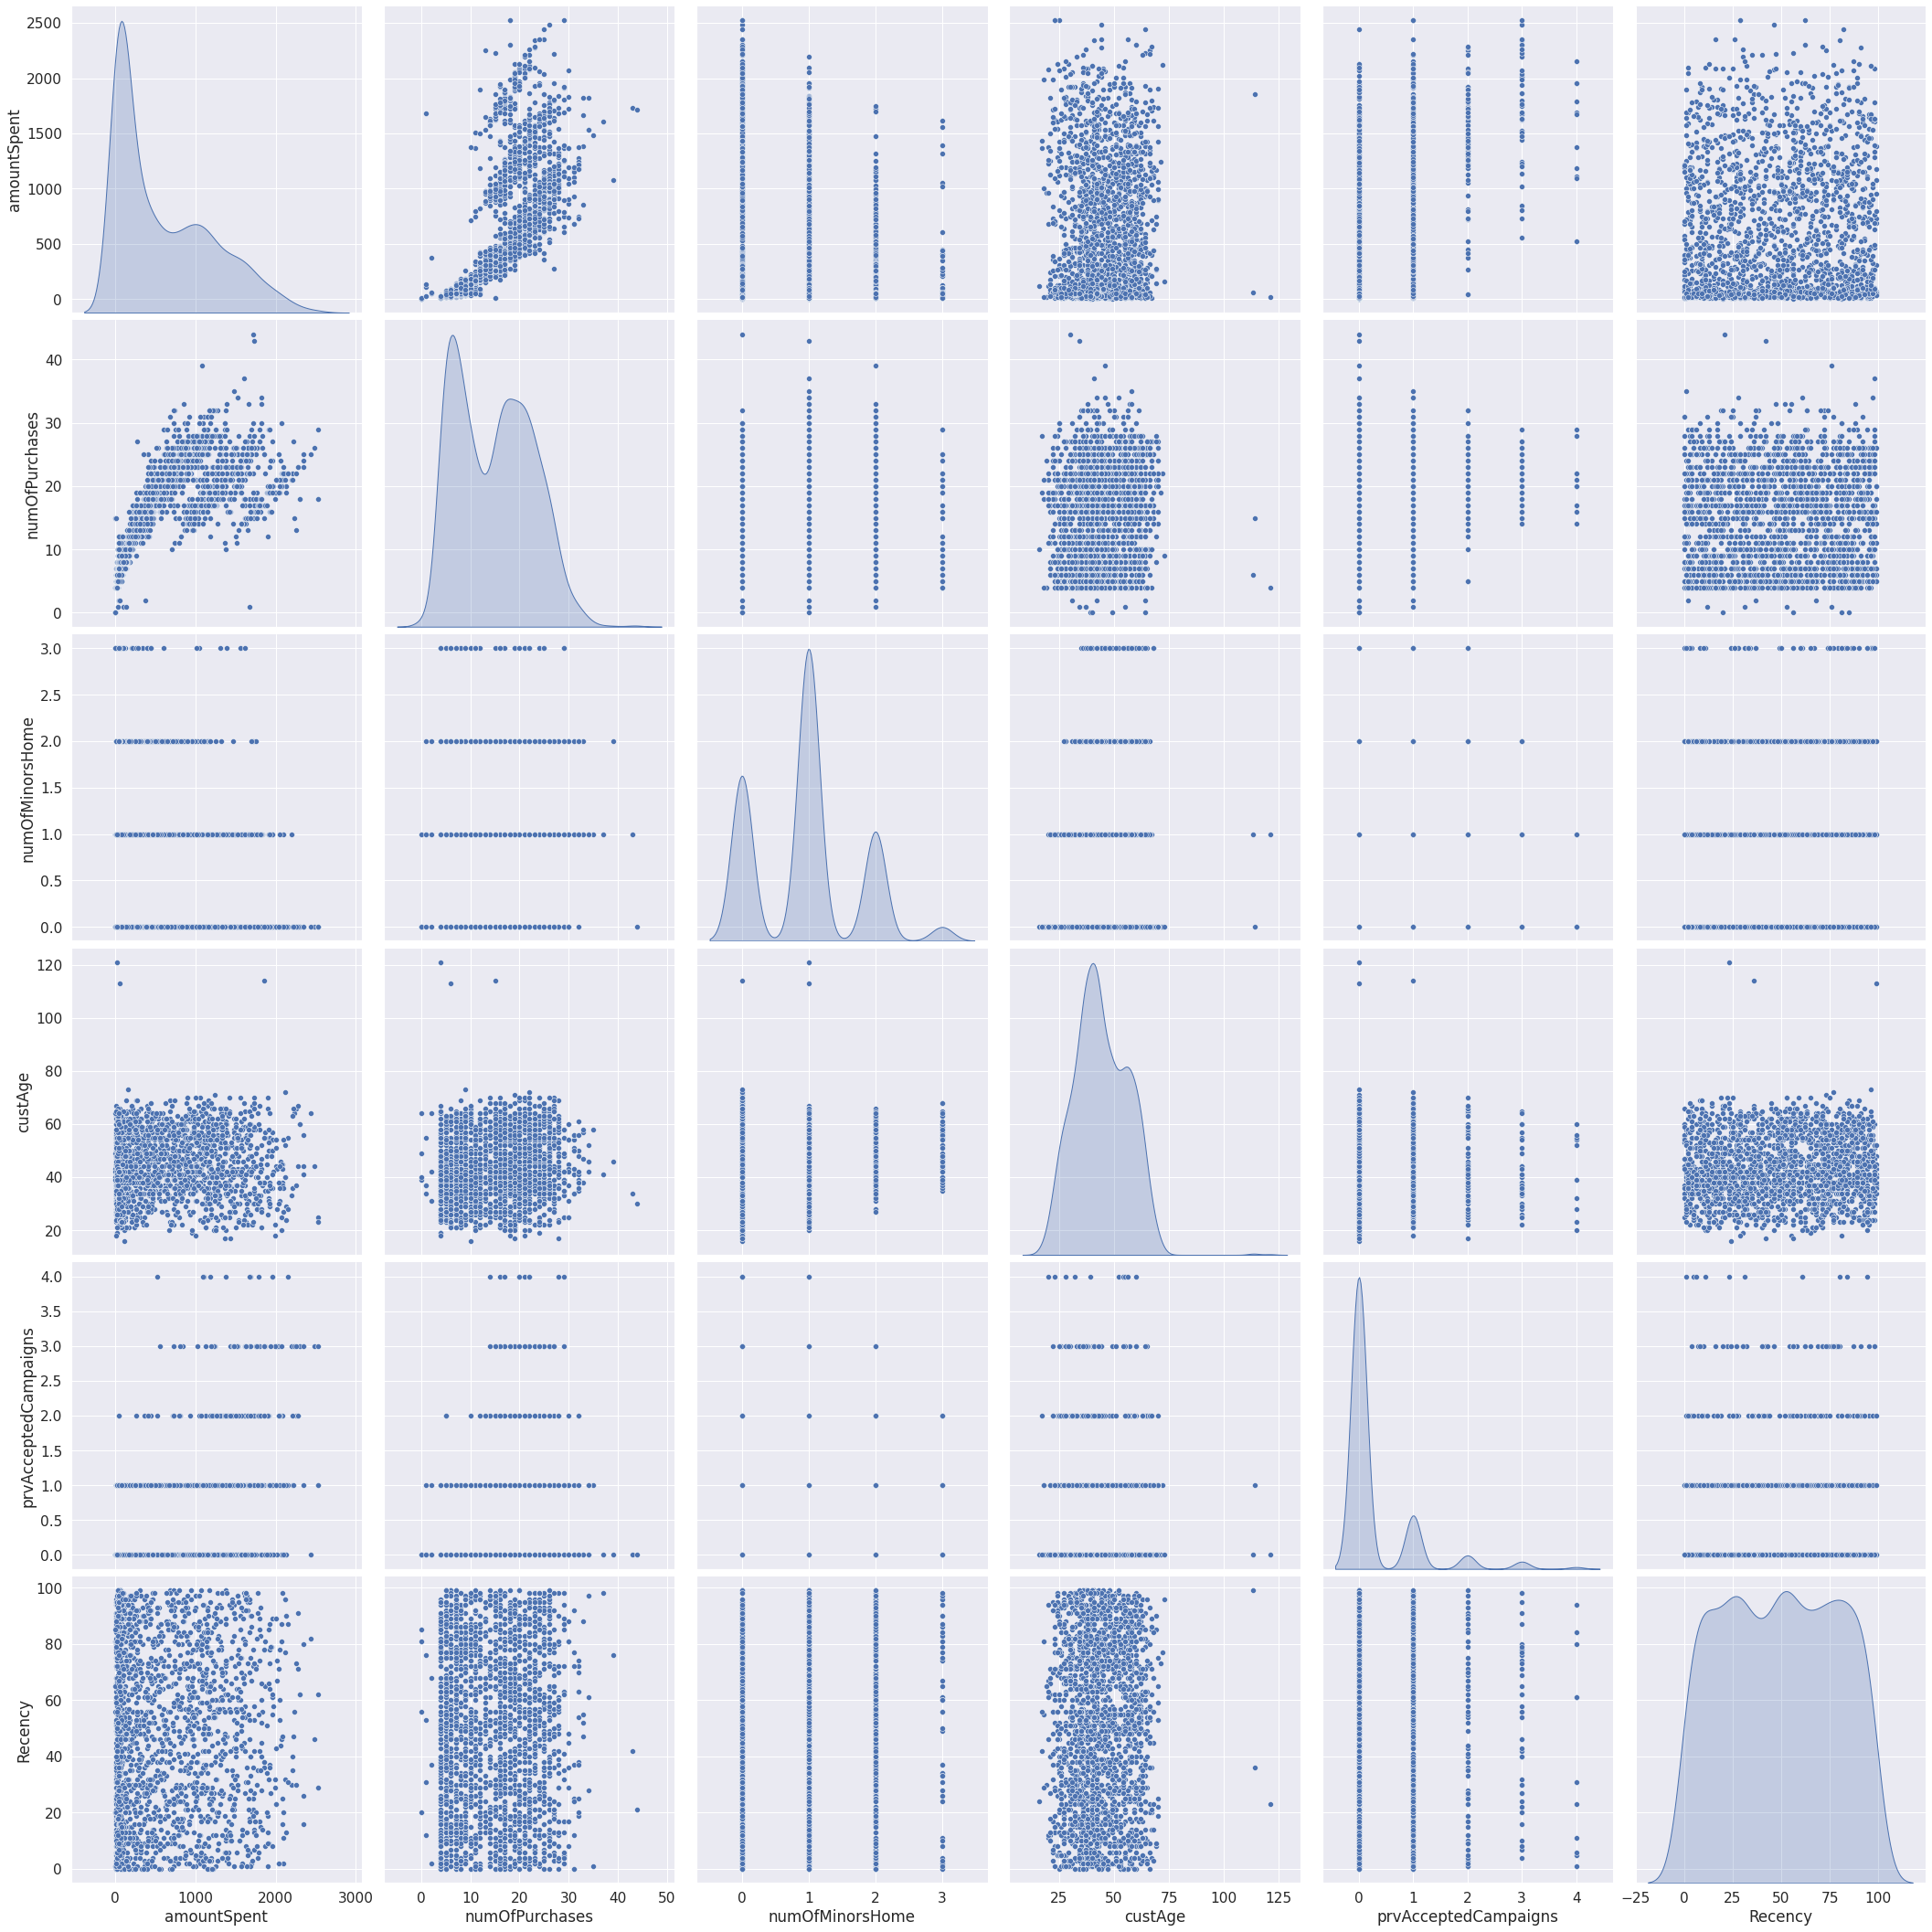

In [44]:
#plt.title('plotting Pairwise relationships amongst the different variables in the data set')
sns.pairplot(marketingdata[['amountSpent', 'numOfPurchases', 'numOfMinorsHome', 'custAge', 'prvAcceptedCampaigns', 'Recency']], diag_kind='kde', height=5)
plt.show()

The pair plots also indicate that customer age and amount spent, and customer age and number of purchases are not strongly correlated.

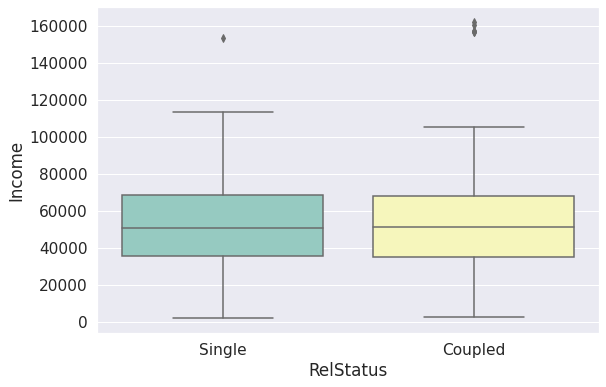

In [45]:
sns.boxplot(x='RelStatus', y='Income', data=marketingdata, palette='Set3')
plt.show()

The box plots shows the distribution of income amongst the RelStatus.

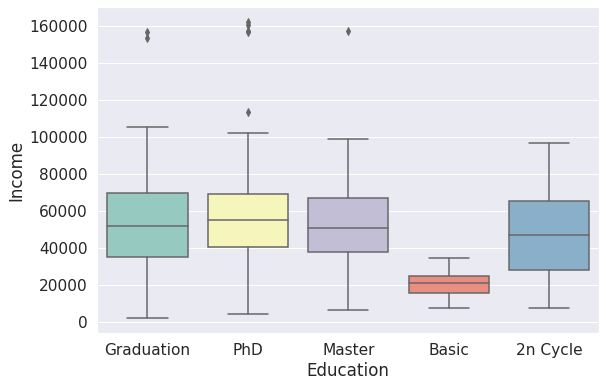

In [46]:
sns.boxplot(x='Education', y='Income', data=marketingdata, palette='Set3')
plt.show()

The above box plot shows the distribution of income amongst the Education values. Graduation, PhD and Master Education are some of the values with outliers and  may be there is some correlation between income and Education that we need to explore. 

In [47]:
# Replace the values of response variable back to 0 and 1 in the data set
marketingdata.loc[marketingdata['Response'] == 'Yes', 'Response'] = 1
marketingdata.loc[marketingdata['Response'] == 'No', 'Response'] = 0

In [48]:
# Write cleaned data file to to_csv

marketingdata.to_csv('/gdrive/MyDrive/DSC540_Project/mdClean.csv')  # Chelsea

# marketingdata.to_csv('/gdrive/.shortcut-targets-by-id/11XRz1on3BinQneHRGDYlLHRG46LSWpcx/DSC540_Project/mdClean.csv')  # Ronaldlee

# Model Building

*Packages used:*

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import balanced_accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
from sklearn.decomposition import PCA


In [50]:
RANDOM_STATE=0
pd.set_option('display.max_columns', 100)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)

In [51]:
# Code to access datasets in same Google Drive folder
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [52]:
# Load the data into a Pandas dataframe

# Chelsea path
# copied_path = '/gdrive/MyDrive/DSC540_Project/mdClean.csv'

# Ronaldlee path
copied_path = '/gdrive/.shortcut-targets-by-id/11XRz1on3BinQneHRGDYlLHRG46LSWpcx/DSC540_Project/mdClean.csv'

mdClean = pd.read_csv(copied_path, sep=',', index_col=0)
mdClean.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,RelStatus,amountSpent,numOfPurchases,numOfMinorsHome,prvAcceptedCampaigns,dateCust,dateCustYear,custAge
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,Single,1617,25,0,0,2012-09-04,2012,55
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,Single,27,6,2,0,2014-03-08,2014,60
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,Coupled,776,21,0,0,2013-08-21,2013,48
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,Coupled,53,8,1,0,2014-02-10,2014,30
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,Coupled,422,19,1,0,2014-01-19,2014,33


In [53]:
mdClean.shape

(2235, 34)

## Data Preparation

In [54]:
y = mdClean.Response
X = mdClean.drop(['Response'], axis=1)
cols = X.columns

In [55]:
print(y)
print(y.sum())
print(y.describe())

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2235, dtype: int64
332
count    2235.000000
mean        0.148546
std         0.355720
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Response, dtype: float64


### Split into training, validation, and testing data

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=RANDOM_STATE)

In [57]:
# Convert y into int type
y_train = y_train.astype('int')

y_val = y_val.astype('int')

y_test = y_test.astype('int')

### Standardize training, validation, and testing X data

Our descriptive statistics indicated our variables have varying ranges, so we standardized our data using scikit learn's Standard Scalar.

In [58]:
# Create numeric datasets by dropping categorical variables

X_train_ss = X_train.drop(columns=['Education', 'Marital_Status', 'Dt_Customer','dateCust', 'RelStatus'])
cols = X_train_ss.columns

X_val_ss = X_val.drop(columns=['Education', 'Marital_Status', 'Dt_Customer','dateCust', 'RelStatus'])

X_test_ss = X_test.drop(columns=['Education', 'Marital_Status', 'Dt_Customer','dateCust', 'RelStatus'])

In [59]:
# Use standard scalar to standardize X data
ss = StandardScaler()
ss.fit(X_train_ss)

X_train_ss = ss.transform(X_train_ss)
X_val_ss = ss.transform(X_val_ss)
X_test_ss = ss.transform(X_test_ss)

In [60]:
# Convert back to pd.DataFrame

X_train_ss = pd.DataFrame(X_train_ss, columns=cols)
X_train_ss

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,amountSpent,numOfPurchases,numOfMinorsHome,prvAcceptedCampaigns,dateCustYear,custAge
0,0.197814,-0.465168,1.015656,-0.939142,-1.066122,-0.852459,-0.646824,-0.709879,-0.692208,-0.541808,-0.811686,-0.685891,-1.129581,-0.956149,-0.877959,1.138337,-0.280056,-0.292918,-0.287251,-0.260694,-0.122083,-0.10296,-0.953389,-1.303463,0.053770,-0.444879,-0.025056,-0.198519
1,-1.123643,-0.636986,1.015656,0.903071,0.112398,-0.826194,-0.670653,-0.732448,-0.654638,-0.637570,-0.772996,-0.166111,-1.129581,-0.956149,-0.570920,-0.532938,-0.280056,-0.292918,-0.287251,-0.260694,-0.122083,-0.10296,-0.948441,-1.042057,1.379484,-0.444879,1.467865,1.200724
2,1.436681,1.269167,-0.829818,-0.939142,-1.655381,0.317792,0.330178,2.427157,0.679124,4.054766,2.941215,-0.685891,-0.038162,1.888673,0.964273,-1.368575,-0.280056,-0.292918,-0.287251,-0.260694,-0.122083,-0.10296,1.679341,0.918484,-1.271944,-0.444879,1.467865,-1.350836
3,-1.288825,0.176040,-0.829818,0.903071,0.563009,0.017204,0.473153,-0.159205,0.040421,1.062204,0.058833,0.873447,0.689451,-0.244943,1.271312,-0.532938,-0.280056,-0.292918,-0.287251,-0.260694,-0.122083,-0.10296,0.066051,0.918484,0.053770,-0.444879,-0.025056,1.283032
4,-1.288825,1.522548,-0.829818,-0.939142,0.840307,-0.429301,0.473153,1.957730,0.491270,1.062204,0.523109,-0.685891,-0.401968,2.599879,-0.570920,-1.368575,-0.280056,3.413923,3.481274,3.835920,-0.122083,-0.10296,0.666499,0.395673,-1.271944,3.912493,-0.025056,1.283032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,-0.710688,1.438368,-0.829818,-0.939142,1.533554,0.271099,-0.003433,-0.308158,1.562037,1.110085,-0.521513,-0.685891,0.325645,2.244276,-0.570920,-0.950757,-0.280056,-0.292918,-0.287251,-0.260694,-0.122083,-0.10296,0.209565,0.526376,-1.271944,-0.444879,-1.517977,0.624565
1426,0.775952,-1.110581,1.015656,-0.939142,-0.234225,-0.852459,-0.575336,-0.682797,-0.466784,-0.422106,-0.618237,0.353668,-0.765774,-0.956149,-0.570920,0.302699,-0.280056,-0.292918,-0.287251,-0.260694,-0.122083,-0.10296,-0.894005,-0.780652,0.053770,-0.444879,1.467865,-0.692369
1427,0.197814,-0.144424,1.015656,-0.939142,1.498892,0.948151,-0.480019,-0.010252,-0.485569,-0.469987,0.252281,0.353668,1.053258,0.110660,1.885390,0.720518,-0.280056,-0.292918,-0.287251,-0.260694,-0.122083,-0.10296,0.445455,1.310592,0.053770,-0.444879,-1.517977,-0.280827
1428,0.610770,-0.998231,1.015656,-0.939142,1.186931,-0.867050,-0.670653,-0.696338,-0.560711,-0.589689,-0.831030,-0.685891,-1.129581,-0.956149,-0.877959,0.720518,-0.280056,-0.292918,-0.287251,-0.260694,-0.122083,-0.10296,-0.951740,-1.303463,0.053770,-0.444879,-0.025056,-0.610061


In [61]:
# Convert validation and testing back to pd.DataFrame
X_val_ss = pd.DataFrame(X_val_ss, columns=cols)
X_test_ss = pd.DataFrame(X_test_ss, columns=cols)

In [62]:
# Add back in the categorical variables Education and RelStatus

X_train_ss['Education'] = X_train['Education']
X_train_ss['RelStatus'] = X_train['RelStatus']

X_val_ss['Education'] = X_val['Education']
X_val_ss['RelStatus'] = X_val['RelStatus']

X_test_ss['Education'] = X_test['Education']
X_test_ss['RelStatus'] = X_test['RelStatus']


In [63]:
# Get dummy variables for education and RelStatus
Xtrain = pd.get_dummies(X_train_ss)

Xval = pd.get_dummies(X_val_ss)

Xtest = pd.get_dummies(X_test_ss)

In [64]:
Xtrain.head() # display the top 5 records

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,amountSpent,numOfPurchases,numOfMinorsHome,prvAcceptedCampaigns,dateCustYear,custAge,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,RelStatus_Coupled,RelStatus_Single
0,0.197814,-0.465168,1.015656,-0.939142,-1.066122,-0.852459,-0.646824,-0.709879,-0.692208,-0.541808,-0.811686,-0.685891,-1.129581,-0.956149,-0.877959,1.138337,-0.280056,-0.292918,-0.287251,-0.260694,-0.122083,-0.10296,-0.953389,-1.303463,0.053770,-0.444879,-0.025056,-0.198519,0,0,1,0,0,0,1
1,-1.123643,-0.636986,1.015656,0.903071,0.112398,-0.826194,-0.670653,-0.732448,-0.654638,-0.637570,-0.772996,-0.166111,-1.129581,-0.956149,-0.570920,-0.532938,-0.280056,-0.292918,-0.287251,-0.260694,-0.122083,-0.10296,-0.948441,-1.042057,1.379484,-0.444879,1.467865,1.200724,0,0,1,0,0,0,1
2,1.436681,1.269167,-0.829818,-0.939142,-1.655381,0.317792,0.330178,2.427157,0.679124,4.054766,2.941215,-0.685891,-0.038162,1.888673,0.964273,-1.368575,-0.280056,-0.292918,-0.287251,-0.260694,-0.122083,-0.10296,1.679341,0.918484,-1.271944,-0.444879,1.467865,-1.350836,0,0,1,0,0,1,0
3,-1.288825,0.176040,-0.829818,0.903071,0.563009,0.017204,0.473153,-0.159205,0.040421,1.062204,0.058833,0.873447,0.689451,-0.244943,1.271312,-0.532938,-0.280056,-0.292918,-0.287251,-0.260694,-0.122083,-0.10296,0.066051,0.918484,0.053770,-0.444879,-0.025056,1.283032,0,0,1,0,0,1,0
4,-1.288825,1.522548,-0.829818,-0.939142,0.840307,-0.429301,0.473153,1.957730,0.491270,1.062204,0.523109,-0.685891,-0.401968,2.599879,-0.570920,-1.368575,-0.280056,3.413923,3.481274,3.835920,-0.122083,-0.10296,0.666499,0.395673,-1.271944,3.912493,-0.025056,1.283032,0,0,0,0,1,1,0


In [65]:
Xval.head() # display the top 5 records

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,amountSpent,numOfPurchases,numOfMinorsHome,prvAcceptedCampaigns,dateCustYear,custAge,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,RelStatus_Coupled,RelStatus_Single
0,0.032632,0.763058,-0.829818,-0.939142,-1.586057,0.419934,1.259521,0.847355,1.299042,0.535514,-0.095926,-0.685891,-0.038162,0.466262,0.350196,-1.368575,-0.280056,-0.292918,-0.287251,-0.260694,-0.122083,-0.10296,0.777020,0.134267,-1.271944,-0.444879,1.467865,0.048407,0,0,0,0,0,0,0
1,0.445588,-1.254369,1.015656,-0.939142,-1.170109,-0.799929,-0.599166,-0.624118,-0.504355,-0.493927,-0.656927,0.353668,-0.401968,-0.956149,-0.877959,1.556155,-0.280056,-0.292918,-0.287251,-0.260694,-0.122083,-0.10296,-0.856064,-0.780652,0.053770,-0.444879,-1.517977,-0.527752,0,0,0,0,0,0,0
2,0.445588,-0.615263,1.015656,-0.939142,1.464229,-0.718216,-0.480019,-0.678283,-0.335286,-0.469987,-0.637582,-0.166111,-0.765774,-0.600546,-0.570920,-0.115119,-0.280056,-0.292918,-0.287251,-0.260694,-0.122083,-0.10296,-0.803278,-0.780652,0.053770,-0.444879,1.467865,-0.363135,0,0,0,0,0,0,0
3,-0.215141,-0.682159,1.015656,0.903071,0.008411,-0.837867,-0.622995,-0.714393,-0.692208,-0.661511,-0.850375,-0.166111,-1.129581,-0.956149,-0.877959,1.138337,-0.280056,-0.292918,-0.287251,-0.260694,-0.122083,-0.10296,-0.956689,-1.172760,1.379484,-0.444879,-1.517977,0.130715,0,0,0,0,0,0,0
4,-1.123643,1.402538,-0.829818,-0.939142,0.216385,1.954976,0.544641,1.190398,2.689159,2.211348,2.805801,-0.685891,-0.401968,2.599879,2.192428,-1.786394,-0.280056,-0.292918,3.481274,-0.260694,-0.122083,-0.10296,2.205557,1.571998,-1.271944,1.007579,-1.517977,1.036107,0,0,0,0,0,0,0


In [66]:
Xtest.head() # display the top 5 records

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,amountSpent,numOfPurchases,numOfMinorsHome,prvAcceptedCampaigns,dateCustYear,custAge,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,RelStatus_Coupled,RelStatus_Single
0,-0.132550,0.496130,-0.829818,-0.939142,-0.962134,1.406329,-0.337043,1.903566,0.021636,0.391871,-0.869720,-0.685891,-0.038162,0.821865,2.192428,-0.950757,-0.280056,3.413923,-0.287251,-0.260694,-0.122083,-0.10296,1.422006,1.049187,-1.271944,1.007579,-0.025056,0.130715,0,0,0,0,0,0,0
1,0.362997,0.876716,1.015656,-0.939142,1.082944,1.879099,3.118207,1.258104,-0.316501,-0.661511,-0.270030,0.353668,-0.765774,2.599879,1.885390,0.720518,-0.280056,-0.292918,-0.287251,-0.260694,-0.122083,-0.10296,1.641401,1.571998,0.053770,-0.444879,-1.517977,-0.445444,0,0,0,0,0,0,0
2,-2.114736,-0.159420,-0.829818,-0.939142,0.147060,0.358649,-0.480019,0.170297,2.313452,0.511573,-0.057236,-0.166111,1.053258,2.599879,-0.263882,0.302699,3.570714,-0.292918,-0.287251,-0.260694,-0.122083,-0.10296,0.465250,1.179889,-1.271944,1.007579,-0.025056,2.106116,0,0,0,0,0,0,0
3,1.023725,-0.808599,1.015656,-0.939142,1.152268,-0.849540,-0.670653,-0.691824,-0.692208,-0.613630,-0.734306,-0.166111,-0.401968,-0.956149,-0.877959,0.302699,-0.280056,-0.292918,-0.287251,-0.260694,-0.122083,-0.10296,-0.945142,-0.911355,0.053770,-0.444879,-0.025056,-1.021602,0,0,0,0,0,0,0
4,-0.380323,0.745353,-0.829818,0.903071,0.181723,1.435513,1.235691,-0.032821,1.562037,-0.398165,-0.231340,1.393227,2.144677,1.533071,1.271312,0.302699,-0.280056,-0.292918,-0.287251,-0.260694,-0.122083,-0.10296,0.974970,2.225511,0.053770,-0.444879,-1.517977,0.295332,0,0,0,0,0,0,0


## Helper Functions

In [67]:
def deriveConfusionMatrix(y_val_cat, val_pred):
    """
    A function that the utilizes the confusion matrix to calculate and print 
    the following metrics: Recall(Sensitivity), Specificity, Precision, Balanced Accuracy, and F1-Score 
    and displays the confusion matrix """
    
    print('\nThe Confusion Matrix is given below:')
    # create a confusion matrix
    metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_val_cat, y_pred=val_pred) 
    plt.grid(False)
    plt.show()

    # Using the classification report from the metrics package to calculate Recall(Sensitivity)
    #, Specificity, Precision and F1-Score.
    print('\nThe classification report is given below:')
    print(metrics.classification_report(y_val_cat, val_pred))

    # Dynamically calculating Recall(Sensitivity), Specificity, Precision, Balanced Accuracy and F1-Score
    TN, FP, FN, TP = metrics.confusion_matrix(y_true=y_val_cat, y_pred=val_pred).ravel() # return the elements of the matrix as array

    profit = (TP * 11) - (FP * 3) - (FN * 11)

    Specificity = TN/(TN+FP)

    Precision = TP/(TP+FP)

    Recall = TP/(TP+FN)

    F1Score = 2 * ((Precision * Recall)/(Precision + Recall))

    BalancedAccuracy = (Recall  + Specificity)/2

    print('Recall (Sensivity): %s' %(str(Recall.round(2))))
    print('Specificity: %s' %(str(Specificity.round(2))))
    print('Precision: %s' %(str(Precision.round(2))))
    print('Balanced Accuracy: %s' %(str(BalancedAccuracy.round(2))))
    print('F1 Score: %s' %(str(F1Score.round(2))))
    print('Profit: %s' %(str(profit)))
    
    return roundOffValue(Recall), roundOffValue(Specificity), roundOffValue(Precision), roundOffValue(BalancedAccuracy), roundOffValue(F1Score), roundOffValue(profit)
    

In [68]:
def roundOffValue(num):
  """A function that returns a number rounded off two decimal places"""
  return num.round(2)

In [69]:
def print_results(results):
  """Function that prints the best GridSearchCV parameters"""
  print('BEST PARAMS: {}\n'.format(results.best_params_))
  return None

In [70]:
def score_keeper(model, xTrain, yTrain, xVal, yVal, scoreDF):
    '''Takes in classification model, fits model, predicts training and validation data, 
    saves training accuracy, validation accuracy, recall, specificity, precision,
    balanced accuracy, and F1 score in dataframe.'''
    
    model.fit(xTrain, yTrain)  # Fit on training
    pred_train = model.predict(xTrain)
    pred_val = model.predict(xVal)

    trainAcc = roundOffValue(accuracy_score(yTrain, pred_train))
    print('\nTraining accuracy:', trainAcc)
    valAcc = roundOffValue(accuracy_score(yVal, pred_val))
    print('Validation accuracy:', valAcc)

    # Get evaluation metrics
    recall, spec, precision, balAcc, F1, profit = deriveConfusionMatrix(yVal, pred_val)
    
    df = pd.DataFrame([[str(model), trainAcc, valAcc, recall, spec, precision, balAcc, F1, profit]], 
                      columns=['model','train acc.', 'val acc.', 'recall', 'specificity',
                               'precision', 'bal acc.', 'F1', 'profit']) 
    
    scoreDF = scoreDF.append(df, ignore_index=True)
    
    return scoreDF

In [71]:
def classGridSearchCV(classWeightBalanced, model, parameters, X_train, y_train, X_val, y_val, score_v, scoreDF):
    """Function that takes GridSearchCV parameters, which are used to initialize a GridSearchCV object and fits the training data to 
    find the best parameters and uses the best model found to derive the model metrics which are stored into a data frame
    """

    # perform a grid Search
    gs = GridSearchCV(model, parameters, scoring=score_v, cv=cv, n_jobs=-1)

    # fit the object with the training data.
    gs.fit(X_train, y_train)

    print_results(gs)
    print('\n')

    # output the model's prediction on the training set
    y_train_pred_gs = gs.best_estimator_.predict(X_train)

    # output the model's prediction on the validation data
    y_val_pred_gs = gs.best_estimator_.predict(X_val)

    trainAcc = roundOffValue(metrics.accuracy_score(y_true=y_train, y_pred=y_train_pred_gs))
    valAcc = roundOffValue(metrics.accuracy_score(y_true=y_val, y_pred=y_val_pred_gs))

    print("The model's accuracy on training is : %s" %str(trainAcc))
    print("The model's accuracy on validation is : %s" %str(valAcc))

    # Get evaluation metrics
    recall, spec, precision, balAcc, F1, profit = deriveConfusionMatrix(y_val, y_val_pred_gs)
    
    df = pd.DataFrame([[str(gs.best_estimator_), trainAcc, valAcc, recall, spec, precision, balAcc, F1, profit]], 
                      columns=['model','train acc.', 'val acc.', 'recall', 'specificity',
                               'precision', 'bal acc.', 'F1', 'profit']) 
    
    if classWeightBalanced == 'classWeightBalanced':
      return scoreDF.append(df, ignore_index=True), gs.best_estimator_
    elif classWeightBalanced == 'underOverSampled':
      return scores_balanced_ds.append(df, ignore_index=True), gs.best_estimator_
    elif classWeightBalanced == 'PCA':
      return scores_PCA_ds.append(df, ignore_index=True), gs.best_estimator_
    


In [72]:
def deriveMetricsOnTest(modelName, y_pred_test):
  """
  A helper function that returns the metrics on the testing data set 
  after taking the predictions on the test data set as a parameter value;
  It also prints a confusion matrix and a classification reports.
  """
  class_Metrics=deriveConfusionMatrix(y_test, y_pred_test)

  TN, FP, FN, TP = metrics.confusion_matrix(y_test, y_pred_test).ravel()

  #profit = (TP*11) - (FP*3) - (FN*11)

  
  # convert the tuple into a list
  listOfMetrics = list(class_Metrics)
  #listOfMetrics.append(profit)
  all_metrics = [str(modelName),
                   roundOffValue(metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test)),]

  # loop through the items of the list and add them to the list of all metrics
  for item in listOfMetrics: 
    all_metrics.append(item)

  return all_metrics
  

In [73]:
# Initialize blank scores and scores_balanced_ds dataframes
col_names = ['model','train acc.', 'val acc.', 'recall', 'specificity',
                              'precision','bal acc.', 'F1', 'profit']
scores = pd.DataFrame(columns=col_names)
scores_balanced_ds = pd.DataFrame(columns=col_names)
scores_PCA_ds = pd.DataFrame(columns=col_names)

## Build Models Using Standardized Data

### Logistic Regression

In [74]:
# initiliaze a LogisticRegression object
lr = LogisticRegression(random_state=RANDOM_STATE)


Training accuracy: 0.89
Validation accuracy: 0.89

The Confusion Matrix is given below:


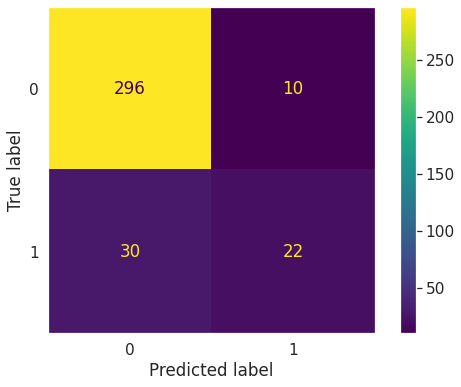


The classification report is given below:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       306
           1       0.69      0.42      0.52        52

    accuracy                           0.89       358
   macro avg       0.80      0.70      0.73       358
weighted avg       0.88      0.89      0.88       358

Recall (Sensivity): 0.42
Specificity: 0.97
Precision: 0.69
Balanced Accuracy: 0.7
F1 Score: 0.52
Profit: -118


,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit
0,LogisticRegression(random_state=0),0.89,0.89,0.42,0.97,0.69,0.7,0.52,-118


In [75]:
# a helper function that takes in classification model, fits model, predicts training and validation data, 
# saves training accuracy, validation accuracy, recall, specificity, precision,
# balanced accuracy, and F1 score in dataframe
scores = score_keeper(lr, Xtrain, y_train, Xval, y_val, scores)
scores

In [76]:
# Use GridSearchCV to find the **hyper parameters** for **Logistic regression**.

parameters = {
    'C': [0.0001, 0.01, 0.1, 0.5, 1, 10, 50],
    'max_iter' : [10, 100, 500, 1000]
} 
parameters

{'C': [0.0001, 0.01, 0.1, 0.5, 1, 10, 50], 'max_iter': [10, 100, 500, 1000]}

In [77]:
lr=LogisticRegression(random_state=RANDOM_STATE, solver='lbfgs', class_weight='balanced')

BEST PARAMS: {'C': 1, 'max_iter': 100}



The model's accuracy on training is : 0.82
The model's accuracy on validation is : 0.8

The Confusion Matrix is given below:


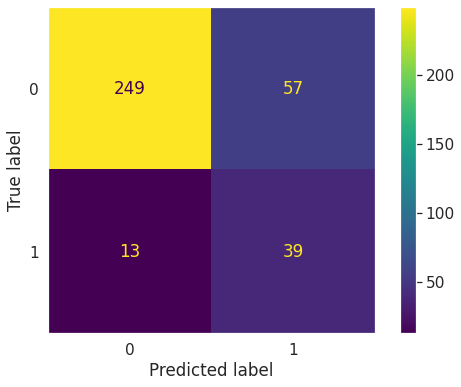


The classification report is given below:
              precision    recall  f1-score   support

           0       0.95      0.81      0.88       306
           1       0.41      0.75      0.53        52

    accuracy                           0.80       358
   macro avg       0.68      0.78      0.70       358
weighted avg       0.87      0.80      0.83       358

Recall (Sensivity): 0.75
Specificity: 0.81
Precision: 0.41
Balanced Accuracy: 0.78
F1 Score: 0.53
Profit: 115
CPU times: user 1.25 s, sys: 1.17 s, total: 2.42 s
Wall time: 3.08 s


In [78]:
%%time

scores, lr_best_est =classGridSearchCV('classWeightBalanced', lr, parameters, Xtrain, y_train, Xval, y_val, 'f1', scores)

In [79]:
pd.get_option('display.max_colwidth') # don't forget to reset this back to 50
pd.set_option('display.max_colwidth', 500)

In [80]:
scores

,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit
0,LogisticRegression(random_state=0),0.89,0.89,0.42,0.97,0.69,0.70,0.52,-118
1,"LogisticRegression(C=1, class_weight='balanced', random_state=0)",0.82,0.80,0.75,0.81,0.41,0.78,0.53,115


Using GridSearchCV to tune the hyper parameters of the logistic regression classifier with class_weight = 'balanced' increased recall to 0.75, balanced accuracy to 0.78 and F1 Score to 0.53. Furthermore, the profit increased from -118 to 115, indicating this tuned Logistic Regression model performed better than the base model. 

### Support Vector Machines Classifier (SVC)

In [81]:
svc = SVC(kernel = 'rbf', random_state=RANDOM_STATE)


Training accuracy: 0.91
Validation accuracy: 0.9

The Confusion Matrix is given below:


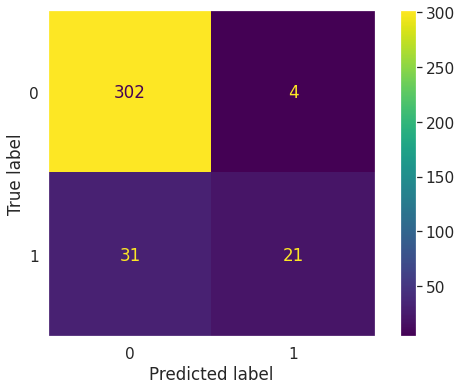


The classification report is given below:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       306
           1       0.84      0.40      0.55        52

    accuracy                           0.90       358
   macro avg       0.87      0.70      0.75       358
weighted avg       0.90      0.90      0.89       358

Recall (Sensivity): 0.4
Specificity: 0.99
Precision: 0.84
Balanced Accuracy: 0.7
F1 Score: 0.55
Profit: -122


,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit
0,LogisticRegression(random_state=0),0.89,0.89,0.42,0.97,0.69,0.70,0.52,-118
1,"LogisticRegression(C=1, class_weight='balanced', random_state=0)",0.82,0.80,0.75,0.81,0.41,0.78,0.53,115
2,SVC(random_state=0),0.91,0.90,0.40,0.99,0.84,0.70,0.55,-122


In [82]:
scores = score_keeper(svc, Xtrain, y_train, Xval, y_val, scores)
scores

**Using GridSearchCV to find the hyper parameters of RBF Kernel SVC**

In [83]:
parameters = {
     'C': [1, 10, 25, 50, 100, 200, 300],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale']   
}
parameters

{'C': [1, 10, 25, 50, 100, 200, 300], 'gamma': [0.001, 0.01, 0.1, 1, 'scale']}

In [84]:
svc = SVC(kernel = 'rbf', class_weight='balanced', random_state=RANDOM_STATE)

BEST PARAMS: {'C': 25, 'gamma': 0.001}



The model's accuracy on training is : 0.83
The model's accuracy on validation is : 0.78

The Confusion Matrix is given below:


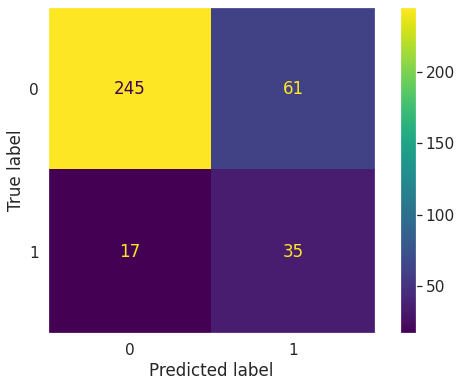


The classification report is given below:
              precision    recall  f1-score   support

           0       0.94      0.80      0.86       306
           1       0.36      0.67      0.47        52

    accuracy                           0.78       358
   macro avg       0.65      0.74      0.67       358
weighted avg       0.85      0.78      0.81       358

Recall (Sensivity): 0.67
Specificity: 0.8
Precision: 0.36
Balanced Accuracy: 0.74
F1 Score: 0.47
Profit: 15
CPU times: user 1.81 s, sys: 69.7 ms, total: 1.88 s
Wall time: 8.25 s


In [85]:
%%time

scores, svc_best_est =classGridSearchCV('classWeightBalanced', svc, parameters, Xtrain, y_train, Xval, y_val, 'f1', scores)

In [86]:
scores

,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit
0,LogisticRegression(random_state=0),0.89,0.89,0.42,0.97,0.69,0.70,0.52,-118
1,"LogisticRegression(C=1, class_weight='balanced', random_state=0)",0.82,0.80,0.75,0.81,0.41,0.78,0.53,115
2,SVC(random_state=0),0.91,0.90,0.40,0.99,0.84,0.70,0.55,-122
3,"SVC(C=25, class_weight='balanced', gamma=0.001, random_state=0)",0.83,0.78,0.67,0.80,0.36,0.74,0.47,15


Using GridSearchCV to tune the hyper parameters of RBF Kernel Support Vector Machines Classifier (SVC) with a balanced data set significantly increased recall, balanced accuracy and profit scores, indicating the tuned SVC model performed better than the base SVC model. However, the tuned Logistic Regression model appears to perform better than the tuned SVC model.

### KNN Classifier

In [87]:
knc = KNeighborsClassifier()


Training accuracy: 0.89
Validation accuracy: 0.89

The Confusion Matrix is given below:


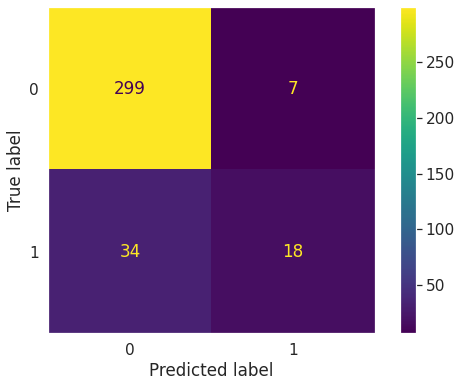


The classification report is given below:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       306
           1       0.72      0.35      0.47        52

    accuracy                           0.89       358
   macro avg       0.81      0.66      0.70       358
weighted avg       0.87      0.89      0.87       358

Recall (Sensivity): 0.35
Specificity: 0.98
Precision: 0.72
Balanced Accuracy: 0.66
F1 Score: 0.47
Profit: -197


,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit
0,LogisticRegression(random_state=0),0.89,0.89,0.42,0.97,0.69,0.70,0.52,-118
1,"LogisticRegression(C=1, class_weight='balanced', random_state=0)",0.82,0.80,0.75,0.81,0.41,0.78,0.53,115
2,SVC(random_state=0),0.91,0.90,0.40,0.99,0.84,0.70,0.55,-122
3,"SVC(C=25, class_weight='balanced', gamma=0.001, random_state=0)",0.83,0.78,0.67,0.80,0.36,0.74,0.47,15
4,KNeighborsClassifier(),0.89,0.89,0.35,0.98,0.72,0.66,0.47,-197


In [88]:
scores = score_keeper(knc, Xtrain, y_train, Xval, y_val, scores)
scores

**Using GridSearchCV to find the hyper parameters of KNN**

In [89]:
parameters = {
    'n_neighbors': [1, 3, 5, 10],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : [2, 5, 15, 30, 50, 100, 200]
}

In [90]:
knc = KNeighborsClassifier()

BEST PARAMS: {'algorithm': 'ball_tree', 'leaf_size': 100, 'n_neighbors': 1, 'weights': 'uniform'}



The model's accuracy on training is : 1.0
The model's accuracy on validation is : 0.85

The Confusion Matrix is given below:


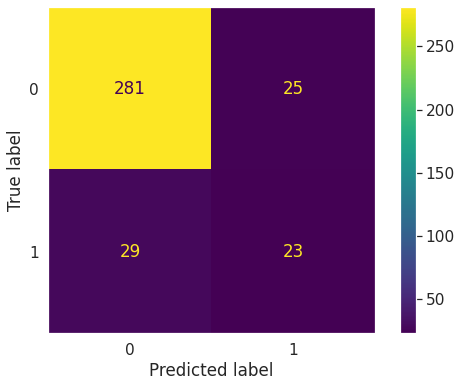


The classification report is given below:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       306
           1       0.48      0.44      0.46        52

    accuracy                           0.85       358
   macro avg       0.69      0.68      0.69       358
weighted avg       0.84      0.85      0.85       358

Recall (Sensivity): 0.44
Specificity: 0.92
Precision: 0.48
Balanced Accuracy: 0.68
F1 Score: 0.46
Profit: -141
CPU times: user 3.92 s, sys: 145 ms, total: 4.06 s
Wall time: 9.13 s


In [91]:
%%time

scores, knc_best_est =classGridSearchCV('classWeightBalanced', knc, parameters, Xtrain, y_train, Xval, y_val, 'f1', scores)

In [92]:
scores

,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit
0,LogisticRegression(random_state=0),0.89,0.89,0.42,0.97,0.69,0.70,0.52,-118
1,"LogisticRegression(C=1, class_weight='balanced', random_state=0)",0.82,0.80,0.75,0.81,0.41,0.78,0.53,115
2,SVC(random_state=0),0.91,0.90,0.40,0.99,0.84,0.70,0.55,-122
3,"SVC(C=25, class_weight='balanced', gamma=0.001, random_state=0)",0.83,0.78,0.67,0.80,0.36,0.74,0.47,15
4,KNeighborsClassifier(),0.89,0.89,0.35,0.98,0.72,0.66,0.47,-197
5,"KNeighborsClassifier(algorithm='ball_tree', leaf_size=100, n_neighbors=1)",1.00,0.85,0.44,0.92,0.48,0.68,0.46,-141


Using GridSearchCV to tune the hyper-parameters of KNN somewhat improved recall and the profit score, compared to the base KNN classifier. However, the KNN model appears to perform worse overall compared to the Logistic Regression and SVC models.

### Decision Tree Classifier

In [93]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)


Training accuracy: 1.0
Validation accuracy: 0.83

The Confusion Matrix is given below:


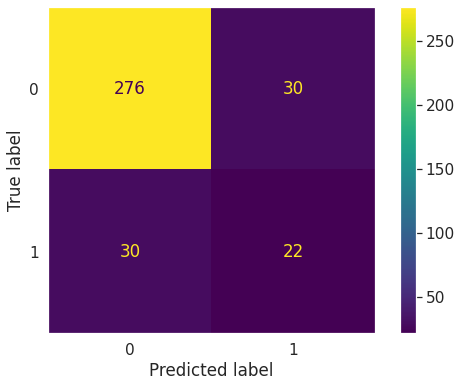


The classification report is given below:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       306
           1       0.42      0.42      0.42        52

    accuracy                           0.83       358
   macro avg       0.66      0.66      0.66       358
weighted avg       0.83      0.83      0.83       358

Recall (Sensivity): 0.42
Specificity: 0.9
Precision: 0.42
Balanced Accuracy: 0.66
F1 Score: 0.42
Profit: -178


,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit
0,LogisticRegression(random_state=0),0.89,0.89,0.42,0.97,0.69,0.70,0.52,-118
1,"LogisticRegression(C=1, class_weight='balanced', random_state=0)",0.82,0.80,0.75,0.81,0.41,0.78,0.53,115
2,SVC(random_state=0),0.91,0.90,0.40,0.99,0.84,0.70,0.55,-122
3,"SVC(C=25, class_weight='balanced', gamma=0.001, random_state=0)",0.83,0.78,0.67,0.80,0.36,0.74,0.47,15
4,KNeighborsClassifier(),0.89,0.89,0.35,0.98,0.72,0.66,0.47,-197
5,"KNeighborsClassifier(algorithm='ball_tree', leaf_size=100, n_neighbors=1)",1.00,0.85,0.44,0.92,0.48,0.68,0.46,-141
6,DecisionTreeClassifier(random_state=0),1.00,0.83,0.42,0.90,0.42,0.66,0.42,-178


In [94]:
scores = score_keeper(dt, Xtrain, y_train, Xval, y_val, scores)
scores

Using GridSearchCV to find the hyperparameters of Decision Tree

In [95]:
parameters = {
    'max_depth': [1, 2, 3, 5, 10, None],
    'min_samples_split' : [2, 5, 10, 30, 50, 70],
    'min_samples_leaf' : [2, 5, 10, 30, 50],
    'max_features': [1, 15, 34]
}

In [96]:
dt = DecisionTreeClassifier(class_weight="balanced", random_state=RANDOM_STATE)

BEST PARAMS: {'max_depth': 10, 'max_features': 34, 'min_samples_leaf': 5, 'min_samples_split': 50}



The model's accuracy on training is : 0.84
The model's accuracy on validation is : 0.78

The Confusion Matrix is given below:


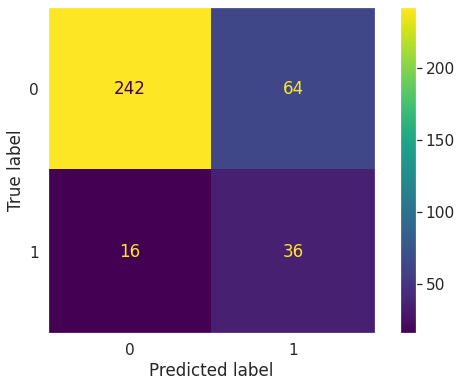


The classification report is given below:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       306
           1       0.36      0.69      0.47        52

    accuracy                           0.78       358
   macro avg       0.65      0.74      0.67       358
weighted avg       0.85      0.78      0.80       358

Recall (Sensivity): 0.69
Specificity: 0.79
Precision: 0.36
Balanced Accuracy: 0.74
F1 Score: 0.47
Profit: 28
CPU times: user 6.79 s, sys: 248 ms, total: 7.04 s
Wall time: 11.4 s


In [97]:
%%time

scores, dt_best_est =classGridSearchCV('classWeightBalanced', dt, parameters, Xtrain, y_train, Xval, y_val, 'f1', scores)

In [98]:
scores

,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit
0,LogisticRegression(random_state=0),0.89,0.89,0.42,0.97,0.69,0.70,0.52,-118
1,"LogisticRegression(C=1, class_weight='balanced', random_state=0)",0.82,0.80,0.75,0.81,0.41,0.78,0.53,115
2,SVC(random_state=0),0.91,0.90,0.40,0.99,0.84,0.70,0.55,-122
3,"SVC(C=25, class_weight='balanced', gamma=0.001, random_state=0)",0.83,0.78,0.67,0.80,0.36,0.74,0.47,15
4,KNeighborsClassifier(),0.89,0.89,0.35,0.98,0.72,0.66,0.47,-197
5,"KNeighborsClassifier(algorithm='ball_tree', leaf_size=100, n_neighbors=1)",1.00,0.85,0.44,0.92,0.48,0.68,0.46,-141
6,DecisionTreeClassifier(random_state=0),1.00,0.83,0.42,0.90,0.42,0.66,0.42,-178
7,"DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_features=34,\n min_samples_leaf=5, min_samples_split=50,\n random_state=0)",0.84,0.78,0.69,0.79,0.36,0.74,0.47,28


The tuned Decision Tree classifier improved in recall, balanced accuracy, F1, and profit, compared to the base Decision Tree classifier. The Decision Tree classifier performed better than the KNN classifier and about the same as SVC, but the Logistic Regression classifier remains the best so far.

### Random Forest Classifier

In [99]:
rf = RandomForestClassifier(random_state=RANDOM_STATE)


Training accuracy: 1.0
Validation accuracy: 0.89

The Confusion Matrix is given below:


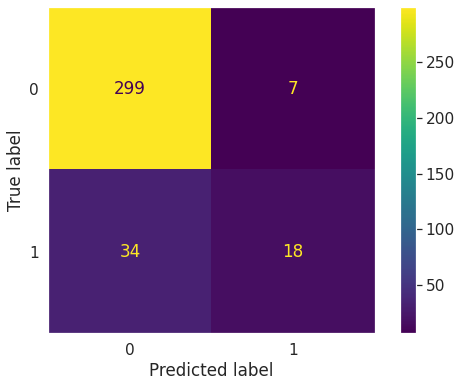


The classification report is given below:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       306
           1       0.72      0.35      0.47        52

    accuracy                           0.89       358
   macro avg       0.81      0.66      0.70       358
weighted avg       0.87      0.89      0.87       358

Recall (Sensivity): 0.35
Specificity: 0.98
Precision: 0.72
Balanced Accuracy: 0.66
F1 Score: 0.47
Profit: -197


,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit
0,LogisticRegression(random_state=0),0.89,0.89,0.42,0.97,0.69,0.70,0.52,-118
1,"LogisticRegression(C=1, class_weight='balanced', random_state=0)",0.82,0.80,0.75,0.81,0.41,0.78,0.53,115
2,SVC(random_state=0),0.91,0.90,0.40,0.99,0.84,0.70,0.55,-122
3,"SVC(C=25, class_weight='balanced', gamma=0.001, random_state=0)",0.83,0.78,0.67,0.80,0.36,0.74,0.47,15
4,KNeighborsClassifier(),0.89,0.89,0.35,0.98,0.72,0.66,0.47,-197
5,"KNeighborsClassifier(algorithm='ball_tree', leaf_size=100, n_neighbors=1)",1.00,0.85,0.44,0.92,0.48,0.68,0.46,-141
6,DecisionTreeClassifier(random_state=0),1.00,0.83,0.42,0.90,0.42,0.66,0.42,-178
7,"DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_features=34,\n min_samples_leaf=5, min_samples_split=50,\n random_state=0)",0.84,0.78,0.69,0.79,0.36,0.74,0.47,28
8,RandomForestClassifier(random_state=0),1.00,0.89,0.35,0.98,0.72,0.66,0.47,-197


In [100]:
scores = score_keeper(rf, Xtrain, y_train, Xval, y_val, scores)
scores

**Use GridSearchCV to find hyperparameters of Random Forest Classifier**

In [101]:
parameters = {
    'n_estimators' : [50,  150, 200],
    'max_depth': [1,  10, 100],
    'min_samples_split' : [2, 100, 300],
    'max_features': [2, 15,  34],
    'bootstrap': [True, False]
}

In [102]:
rf = RandomForestClassifier(class_weight="balanced", random_state=RANDOM_STATE)

BEST PARAMS: {'bootstrap': False, 'max_depth': 10, 'max_features': 15, 'min_samples_split': 100, 'n_estimators': 200}



The model's accuracy on training is : 0.83
The model's accuracy on validation is : 0.8

The Confusion Matrix is given below:


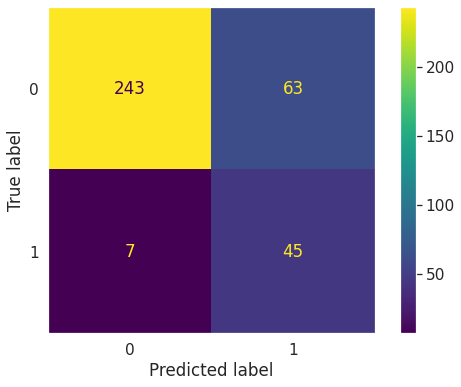


The classification report is given below:
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       306
           1       0.42      0.87      0.56        52

    accuracy                           0.80       358
   macro avg       0.69      0.83      0.72       358
weighted avg       0.89      0.80      0.83       358

Recall (Sensivity): 0.87
Specificity: 0.79
Precision: 0.42
Balanced Accuracy: 0.83
F1 Score: 0.56
Profit: 229
CPU times: user 11.8 s, sys: 510 ms, total: 12.3 s
Wall time: 2min 40s


In [103]:
%%time

scores, rf_best_est =classGridSearchCV('classWeightBalanced', rf, parameters, Xtrain, y_train, Xval, y_val, 'f1', scores)

In [104]:
scores

,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit
0,LogisticRegression(random_state=0),0.89,0.89,0.42,0.97,0.69,0.70,0.52,-118
1,"LogisticRegression(C=1, class_weight='balanced', random_state=0)",0.82,0.80,0.75,0.81,0.41,0.78,0.53,115
2,SVC(random_state=0),0.91,0.90,0.40,0.99,0.84,0.70,0.55,-122
3,"SVC(C=25, class_weight='balanced', gamma=0.001, random_state=0)",0.83,0.78,0.67,0.80,0.36,0.74,0.47,15
4,KNeighborsClassifier(),0.89,0.89,0.35,0.98,0.72,0.66,0.47,-197
5,"KNeighborsClassifier(algorithm='ball_tree', leaf_size=100, n_neighbors=1)",1.00,0.85,0.44,0.92,0.48,0.68,0.46,-141
6,DecisionTreeClassifier(random_state=0),1.00,0.83,0.42,0.90,0.42,0.66,0.42,-178
7,"DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_features=34,\n min_samples_leaf=5, min_samples_split=50,\n random_state=0)",0.84,0.78,0.69,0.79,0.36,0.74,0.47,28
8,RandomForestClassifier(random_state=0),1.00,0.89,0.35,0.98,0.72,0.66,0.47,-197
9,"RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=10,\n max_features=15, min_samples_split=100, n_estimators=200,\n random_state=0)",0.83,0.80,0.87,0.79,0.42,0.83,0.56,229


The tuned Random Forest classifier significantly improved the recall, balanced accuracy, F1, and profit score compared to the base Random Forest classifier. This model has the highest profit score thus far.

## Examination of Variable Importance

We sought to examine variable importance using the random forest best estimator feature importance attribute.

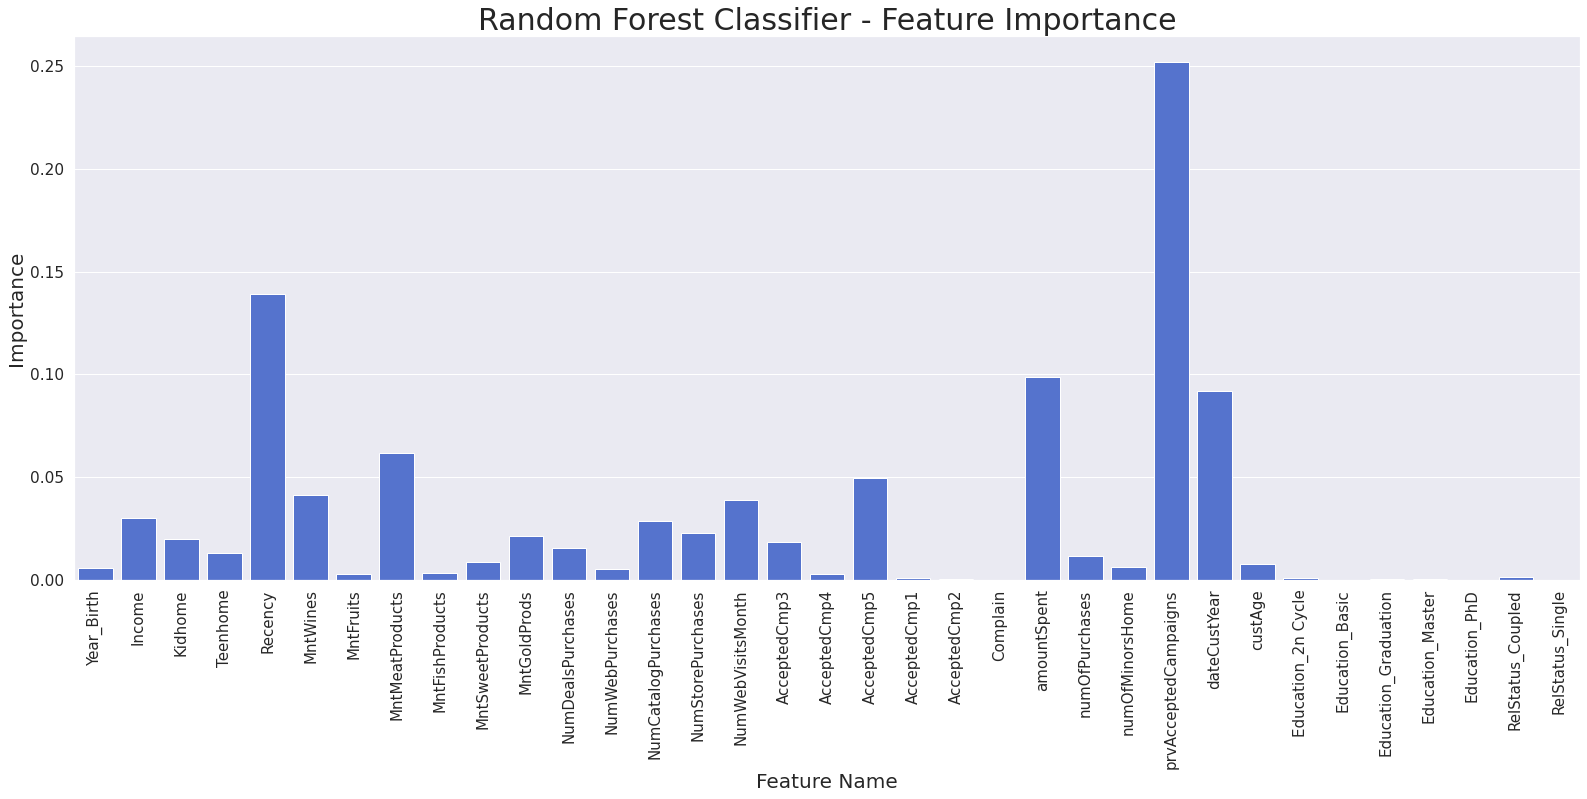

In [105]:
feature_of_importance = rf_best_est.feature_importances_
feature_names = Xtrain.columns
plt.figure(figsize=[27,10])
sns.barplot(x = feature_names, y = feature_of_importance,color="royalblue")
plt.xticks(rotation = 90, fontsize=15)
plt.title('Random Forest Classifier - Feature Importance', fontsize=30)
plt.ylabel('Importance',fontsize=20)
plt.xlabel('Feature Name', fontsize=20)
plt.show()

Here, we see 34 variables with their importances of which Recency, PreviousAcceptedCampaigns and amountSpent are significant features in determining whether a customer accepted the offer in the last campaign or not. 

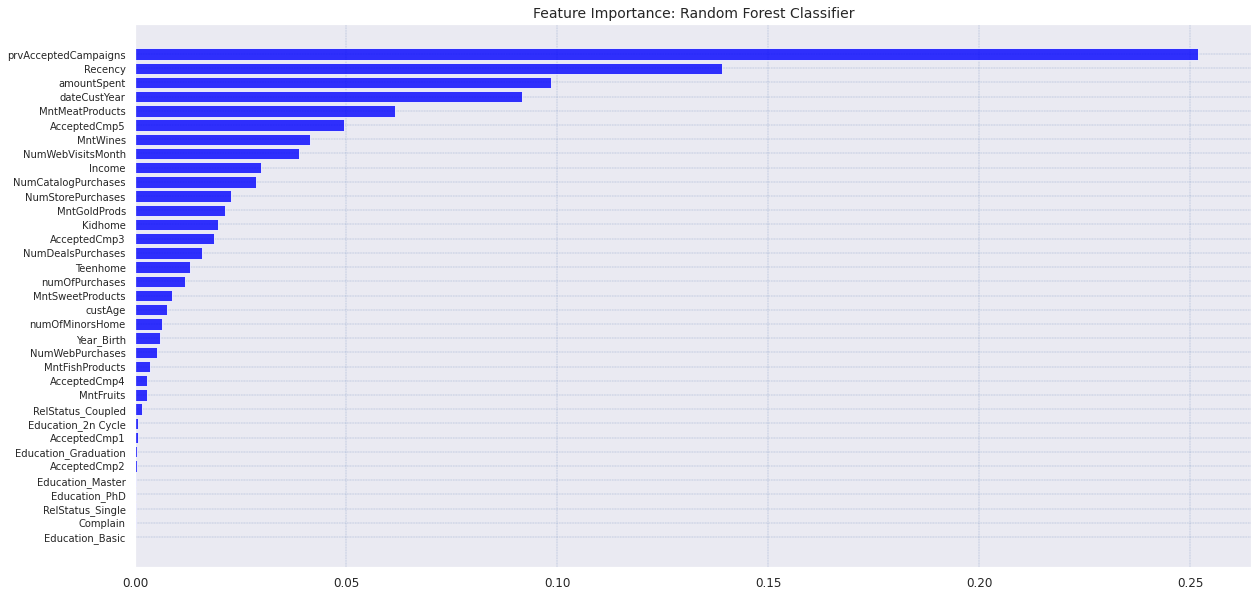

In [106]:
model_type = 'rf' 
model_dict = {'rf':rf_best_est.feature_importances_}
importances = model_dict[model_type]
indices = list(np.argsort(importances)) 
feature_names=Xtrain.columns
names = [ feature_names[i] for i in indices]

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=[20,10])
ax.barh(names, importances[indices], color = 'blue', align ='center',alpha=0.8)

xticklabel_rotation = 0
plt.xticks(rotation=xticklabel_rotation,fontsize=12)

plt.yticks(fontsize=10)
ax.grid(color='b', ls = '-.', lw = 0.25)

# Title
ax.set_title("Feature Importance: Random Forest Classifier",fontsize=14)

# Show plot
plt.show()

Once our features are sorted as shown above, Education_Basic, Complain and AcceptedCmp2 have less significance to the model. 

### Adaboost Classifier

In [107]:
ab = AdaBoostClassifier(random_state=RANDOM_STATE)


Training accuracy: 0.9
Validation accuracy: 0.89

The Confusion Matrix is given below:


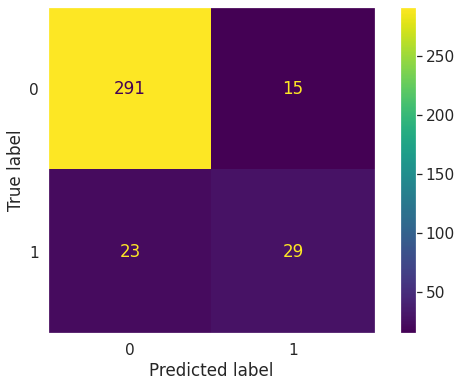


The classification report is given below:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       306
           1       0.66      0.56      0.60        52

    accuracy                           0.89       358
   macro avg       0.79      0.75      0.77       358
weighted avg       0.89      0.89      0.89       358

Recall (Sensivity): 0.56
Specificity: 0.95
Precision: 0.66
Balanced Accuracy: 0.75
F1 Score: 0.6
Profit: 21


,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit
0,LogisticRegression(random_state=0),0.89,0.89,0.42,0.97,0.69,0.70,0.52,-118
1,"LogisticRegression(C=1, class_weight='balanced', random_state=0)",0.82,0.80,0.75,0.81,0.41,0.78,0.53,115
2,SVC(random_state=0),0.91,0.90,0.40,0.99,0.84,0.70,0.55,-122
3,"SVC(C=25, class_weight='balanced', gamma=0.001, random_state=0)",0.83,0.78,0.67,0.80,0.36,0.74,0.47,15
4,KNeighborsClassifier(),0.89,0.89,0.35,0.98,0.72,0.66,0.47,-197
5,"KNeighborsClassifier(algorithm='ball_tree', leaf_size=100, n_neighbors=1)",1.00,0.85,0.44,0.92,0.48,0.68,0.46,-141
6,DecisionTreeClassifier(random_state=0),1.00,0.83,0.42,0.90,0.42,0.66,0.42,-178
7,"DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_features=34,\n min_samples_leaf=5, min_samples_split=50,\n random_state=0)",0.84,0.78,0.69,0.79,0.36,0.74,0.47,28
8,RandomForestClassifier(random_state=0),1.00,0.89,0.35,0.98,0.72,0.66,0.47,-197
9,"RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=10,\n max_features=15, min_samples_split=100, n_estimators=200,\n random_state=0)",0.83,0.80,0.87,0.79,0.42,0.83,0.56,229


In [108]:
scores = score_keeper(ab, Xtrain, y_train, Xval, y_val, scores)
scores

**Use GridSearchCV to find best hyperparameters of AdaBoost Classifier**

In [109]:
parameters = {
    'n_estimators' : [50,  250, 400],
    'learning_rate': [0.5,  1.5, 2.0]
}

In [110]:
ab = AdaBoostClassifier(random_state=RANDOM_STATE)

BEST PARAMS: {'learning_rate': 1.5, 'n_estimators': 250}



The model's accuracy on training is : 0.97
The model's accuracy on validation is : 0.87

The Confusion Matrix is given below:


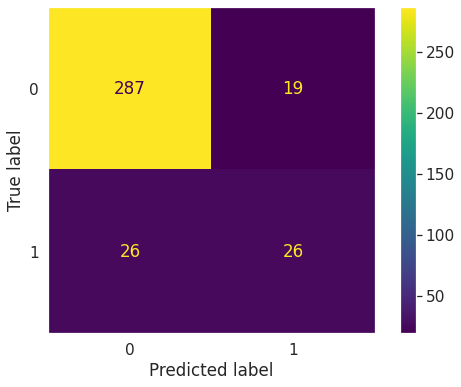


The classification report is given below:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       306
           1       0.58      0.50      0.54        52

    accuracy                           0.87       358
   macro avg       0.75      0.72      0.73       358
weighted avg       0.87      0.87      0.87       358

Recall (Sensivity): 0.5
Specificity: 0.94
Precision: 0.58
Balanced Accuracy: 0.72
F1 Score: 0.54
Profit: -57
CPU times: user 1.86 s, sys: 39.7 ms, total: 1.9 s
Wall time: 16.2 s


In [111]:
%%time

scores, ab_best_est =classGridSearchCV('classWeightBalanced', ab, parameters, Xtrain, y_train, Xval, y_val, 'f1', scores)

In [112]:
scores

,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit
0,LogisticRegression(random_state=0),0.89,0.89,0.42,0.97,0.69,0.70,0.52,-118
1,"LogisticRegression(C=1, class_weight='balanced', random_state=0)",0.82,0.80,0.75,0.81,0.41,0.78,0.53,115
2,SVC(random_state=0),0.91,0.90,0.40,0.99,0.84,0.70,0.55,-122
3,"SVC(C=25, class_weight='balanced', gamma=0.001, random_state=0)",0.83,0.78,0.67,0.80,0.36,0.74,0.47,15
4,KNeighborsClassifier(),0.89,0.89,0.35,0.98,0.72,0.66,0.47,-197
5,"KNeighborsClassifier(algorithm='ball_tree', leaf_size=100, n_neighbors=1)",1.00,0.85,0.44,0.92,0.48,0.68,0.46,-141
6,DecisionTreeClassifier(random_state=0),1.00,0.83,0.42,0.90,0.42,0.66,0.42,-178
7,"DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_features=34,\n min_samples_leaf=5, min_samples_split=50,\n random_state=0)",0.84,0.78,0.69,0.79,0.36,0.74,0.47,28
8,RandomForestClassifier(random_state=0),1.00,0.89,0.35,0.98,0.72,0.66,0.47,-197
9,"RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=10,\n max_features=15, min_samples_split=100, n_estimators=200,\n random_state=0)",0.83,0.80,0.87,0.79,0.42,0.83,0.56,229


The tuned Adaboost classifier performed worse on all metrics compared to the base AdabBoost classifier. 

### Gradient Boosting Classifier

In [113]:
gb = GradientBoostingClassifier(random_state=RANDOM_STATE)


Training accuracy: 0.95
Validation accuracy: 0.91

The Confusion Matrix is given below:


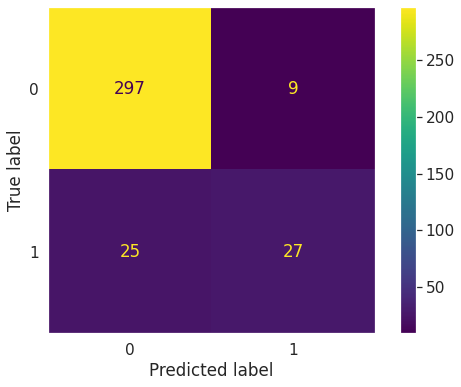


The classification report is given below:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       306
           1       0.75      0.52      0.61        52

    accuracy                           0.91       358
   macro avg       0.84      0.74      0.78       358
weighted avg       0.90      0.91      0.90       358

Recall (Sensivity): 0.52
Specificity: 0.97
Precision: 0.75
Balanced Accuracy: 0.74
F1 Score: 0.61
Profit: -5


,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit
0,LogisticRegression(random_state=0),0.89,0.89,0.42,0.97,0.69,0.70,0.52,-118
1,"LogisticRegression(C=1, class_weight='balanced', random_state=0)",0.82,0.80,0.75,0.81,0.41,0.78,0.53,115
2,SVC(random_state=0),0.91,0.90,0.40,0.99,0.84,0.70,0.55,-122
3,"SVC(C=25, class_weight='balanced', gamma=0.001, random_state=0)",0.83,0.78,0.67,0.80,0.36,0.74,0.47,15
4,KNeighborsClassifier(),0.89,0.89,0.35,0.98,0.72,0.66,0.47,-197
5,"KNeighborsClassifier(algorithm='ball_tree', leaf_size=100, n_neighbors=1)",1.00,0.85,0.44,0.92,0.48,0.68,0.46,-141
6,DecisionTreeClassifier(random_state=0),1.00,0.83,0.42,0.90,0.42,0.66,0.42,-178
7,"DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_features=34,\n min_samples_leaf=5, min_samples_split=50,\n random_state=0)",0.84,0.78,0.69,0.79,0.36,0.74,0.47,28
8,RandomForestClassifier(random_state=0),1.00,0.89,0.35,0.98,0.72,0.66,0.47,-197
9,"RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=10,\n max_features=15, min_samples_split=100, n_estimators=200,\n random_state=0)",0.83,0.80,0.87,0.79,0.42,0.83,0.56,229


In [114]:
scores = score_keeper(gb, Xtrain, y_train, Xval, y_val, scores)
scores

**Use GridSearchCV to best hyperparameters of Gradient Boosting Classifier**

In [115]:
parameters = dict(
    learning_rate = [0.1, 0.5,  1.5],
    n_estimators = [30,  200, 600],
    max_depth = [2,  5,  6],
    min_samples_split = [2,  10, 100],
    subsample = [0.5, 1]
    )

In [116]:
gb = GradientBoostingClassifier(random_state=RANDOM_STATE)

BEST PARAMS: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 100, 'n_estimators': 200, 'subsample': 0.5}



The model's accuracy on training is : 0.98
The model's accuracy on validation is : 0.89

The Confusion Matrix is given below:


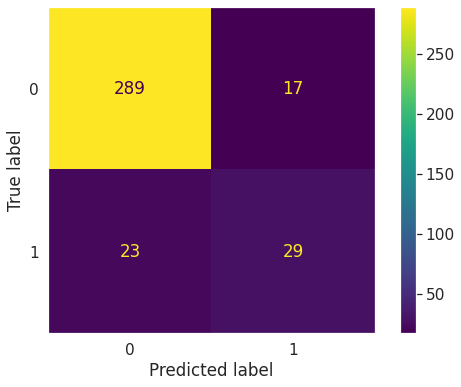


The classification report is given below:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       306
           1       0.63      0.56      0.59        52

    accuracy                           0.89       358
   macro avg       0.78      0.75      0.76       358
weighted avg       0.88      0.89      0.89       358

Recall (Sensivity): 0.56
Specificity: 0.94
Precision: 0.63
Balanced Accuracy: 0.75
F1 Score: 0.59
Profit: 15
CPU times: user 13 s, sys: 708 ms, total: 13.7 s
Wall time: 7min 5s


In [117]:
%%time

scores, gb_best_est =classGridSearchCV('classWeightBalanced', gb, parameters, Xtrain, y_train, Xval, y_val, 'f1', scores)

In [118]:
scores

,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit
0,LogisticRegression(random_state=0),0.89,0.89,0.42,0.97,0.69,0.70,0.52,-118
1,"LogisticRegression(C=1, class_weight='balanced', random_state=0)",0.82,0.80,0.75,0.81,0.41,0.78,0.53,115
2,SVC(random_state=0),0.91,0.90,0.40,0.99,0.84,0.70,0.55,-122
3,"SVC(C=25, class_weight='balanced', gamma=0.001, random_state=0)",0.83,0.78,0.67,0.80,0.36,0.74,0.47,15
4,KNeighborsClassifier(),0.89,0.89,0.35,0.98,0.72,0.66,0.47,-197
5,"KNeighborsClassifier(algorithm='ball_tree', leaf_size=100, n_neighbors=1)",1.00,0.85,0.44,0.92,0.48,0.68,0.46,-141
6,DecisionTreeClassifier(random_state=0),1.00,0.83,0.42,0.90,0.42,0.66,0.42,-178
7,"DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_features=34,\n min_samples_leaf=5, min_samples_split=50,\n random_state=0)",0.84,0.78,0.69,0.79,0.36,0.74,0.47,28
8,RandomForestClassifier(random_state=0),1.00,0.89,0.35,0.98,0.72,0.66,0.47,-197
9,"RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=10,\n max_features=15, min_samples_split=100, n_estimators=200,\n random_state=0)",0.83,0.80,0.87,0.79,0.42,0.83,0.56,229


The tuned GradientBoosting classifier slightly improved in recall, balanced accuracy, and profit, comapred to the base Gradient Boosting classifer.

## Create and Build Models Using Balanced Dataset

In [119]:
y_train.value_counts()

0    1206
1     224
Name: Response, dtype: int64

We used the **Synthetic Minority OverSampling Technique** (SMOTE) package to create a more balanced dataset by oversampling the majority class using SMOTE and randomly undersampling the minority class with the goal of addressing the class imbalance problem and improving model performance.

In [120]:
sampling_strategy_u = {0 : 500} 
sampling_strategy_o = {1: 800}

# transform the data set

overSample = SMOTE(sampling_strategy=sampling_strategy_o)
underSample = RandomUnderSampler(sampling_strategy=sampling_strategy_u)
# create the steps
steps = [('o', overSample), ('u', underSample)]

# create a pipeline object using the steps as your parameter
pipeline=Pipeline(steps=steps)
XtrainT, y_trainT = pipeline.fit_resample(Xtrain, y_train)

Now that we have a balanced data set, let's explore how we can **tune** the different classification algorithms.

### Logistic Regression

In [121]:
# Use GridSearchCV to find the **hyper parameters** for **Logistic regression**.

parameters = {
    'C': [0.1, 0.5, 1, 10, 20, 30, 50]
    #'max_iter' : [10, 100, 200, 300, 500]
} 
parameters

{'C': [0.1, 0.5, 1, 10, 20, 30, 50]}

In [122]:
lr=LogisticRegression(max_iter=10000, random_state=RANDOM_STATE, solver='lbfgs')

BEST PARAMS: {'C': 50}



The model's accuracy on training is : 0.86
The model's accuracy on validation is : 0.7

The Confusion Matrix is given below:


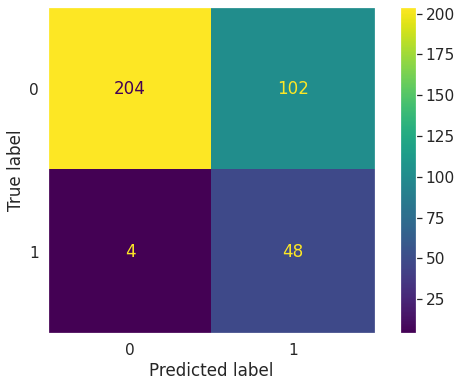


The classification report is given below:
              precision    recall  f1-score   support

           0       0.98      0.67      0.79       306
           1       0.32      0.92      0.48        52

    accuracy                           0.70       358
   macro avg       0.65      0.79      0.63       358
weighted avg       0.88      0.70      0.75       358

Recall (Sensivity): 0.92
Specificity: 0.67
Precision: 0.32
Balanced Accuracy: 0.79
F1 Score: 0.48
Profit: 178
CPU times: user 1.04 s, sys: 1.2 s, total: 2.24 s
Wall time: 1.06 s


In [123]:
%%time
scores_balanced_ds, lr_bal_best_est =classGridSearchCV('underOverSampled', lr, parameters, XtrainT, y_trainT, Xval, y_val, 'f1', scores_balanced_ds)

### Support Vector Machines Classifier

In [124]:
parameters = {
     'C': [1, 10, 25, 50, 100, 200, 300],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale']   
}
parameters

{'C': [1, 10, 25, 50, 100, 200, 300], 'gamma': [0.001, 0.01, 0.1, 1, 'scale']}

In [125]:
svc = SVC(kernel = 'rbf', random_state=RANDOM_STATE)

BEST PARAMS: {'C': 10, 'gamma': 0.1}



The model's accuracy on training is : 0.99
The model's accuracy on validation is : 0.78

The Confusion Matrix is given below:


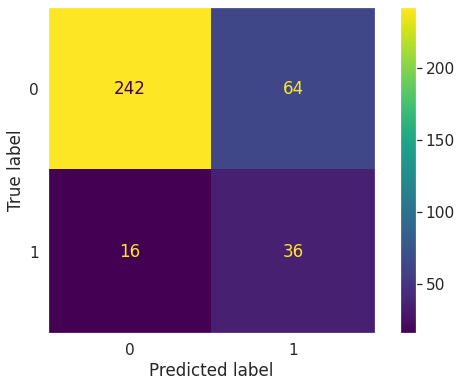


The classification report is given below:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       306
           1       0.36      0.69      0.47        52

    accuracy                           0.78       358
   macro avg       0.65      0.74      0.67       358
weighted avg       0.85      0.78      0.80       358

Recall (Sensivity): 0.69
Specificity: 0.79
Precision: 0.36
Balanced Accuracy: 0.74
F1 Score: 0.47
Profit: 28
CPU times: user 1.62 s, sys: 56.5 ms, total: 1.68 s
Wall time: 6.77 s


In [126]:
%%time
scores_balanced_ds, svc_bal_best_est =classGridSearchCV('underOverSampled', svc, parameters, XtrainT, y_trainT, Xval, y_val, 'f1', scores_balanced_ds)

In [127]:
scores_balanced_ds

,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit
0,"LogisticRegression(C=50, max_iter=10000, random_state=0)",0.86,0.70,0.92,0.67,0.32,0.79,0.48,178
1,"SVC(C=10, gamma=0.1, random_state=0)",0.99,0.78,0.69,0.79,0.36,0.74,0.47,28


### KNN Classifier

In [128]:
parameters = {
    'n_neighbors': [1, 3, 5, 10],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : [2, 5, 15, 30, 50, 100, 200]
}

In [129]:
knc = KNeighborsClassifier()

BEST PARAMS: {'algorithm': 'auto', 'leaf_size': 2, 'n_neighbors': 1, 'weights': 'uniform'}



The model's accuracy on training is : 1.0
The model's accuracy on validation is : 0.72

The Confusion Matrix is given below:


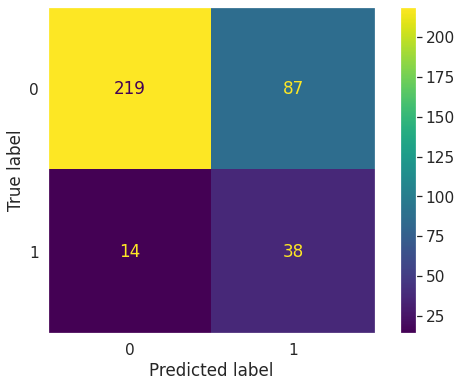


The classification report is given below:
              precision    recall  f1-score   support

           0       0.94      0.72      0.81       306
           1       0.30      0.73      0.43        52

    accuracy                           0.72       358
   macro avg       0.62      0.72      0.62       358
weighted avg       0.85      0.72      0.76       358

Recall (Sensivity): 0.73
Specificity: 0.72
Precision: 0.3
Balanced Accuracy: 0.72
F1 Score: 0.43
Profit: 3
CPU times: user 3.81 s, sys: 1.39 s, total: 5.2 s
Wall time: 7.91 s


In [130]:
%%time
scores_balanced_ds, knc_bal_best_est =classGridSearchCV('underOverSampled', knc, parameters, XtrainT, y_trainT, Xval, y_val, 'f1', scores_balanced_ds)

In [131]:
scores_balanced_ds

,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit
0,"LogisticRegression(C=50, max_iter=10000, random_state=0)",0.86,0.70,0.92,0.67,0.32,0.79,0.48,178
1,"SVC(C=10, gamma=0.1, random_state=0)",0.99,0.78,0.69,0.79,0.36,0.74,0.47,28
2,"KNeighborsClassifier(leaf_size=2, n_neighbors=1)",1.00,0.72,0.73,0.72,0.30,0.72,0.43,3


### Decision Tree Classifier

In [132]:
parameters = {
    'max_depth': [1,  5, 10],
    'min_samples_split' : [2, 10,  100],
    'min_samples_leaf' : [2, 10, 100],
    'max_features': [1, 15, 34]
}

In [133]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)

BEST PARAMS: {'max_depth': 10, 'max_features': 34, 'min_samples_leaf': 10, 'min_samples_split': 2}



The model's accuracy on training is : 0.91
The model's accuracy on validation is : 0.74

The Confusion Matrix is given below:


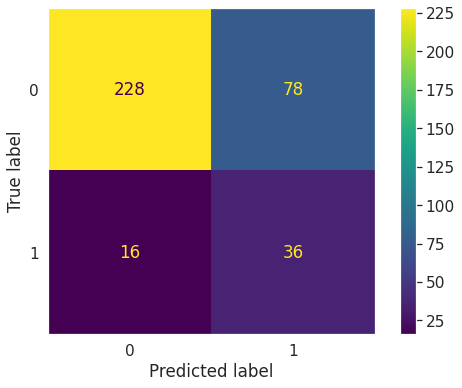


The classification report is given below:
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       306
           1       0.32      0.69      0.43        52

    accuracy                           0.74       358
   macro avg       0.63      0.72      0.63       358
weighted avg       0.84      0.74      0.77       358

Recall (Sensivity): 0.69
Specificity: 0.75
Precision: 0.32
Balanced Accuracy: 0.72
F1 Score: 0.43
Profit: -14
CPU times: user 1.45 s, sys: 41 ms, total: 1.49 s
Wall time: 2.1 s


In [134]:
%%time
scores_balanced_ds, dt_bal_best_est =classGridSearchCV('underOverSampled', dt, parameters, XtrainT, y_trainT, Xval, y_val, 'f1', scores_balanced_ds)

In [135]:
scores_balanced_ds

,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit
0,"LogisticRegression(C=50, max_iter=10000, random_state=0)",0.86,0.70,0.92,0.67,0.32,0.79,0.48,178
1,"SVC(C=10, gamma=0.1, random_state=0)",0.99,0.78,0.69,0.79,0.36,0.74,0.47,28
2,"KNeighborsClassifier(leaf_size=2, n_neighbors=1)",1.00,0.72,0.73,0.72,0.30,0.72,0.43,3
3,"DecisionTreeClassifier(max_depth=10, max_features=34, min_samples_leaf=10,\n random_state=0)",0.91,0.74,0.69,0.75,0.32,0.72,0.43,-14


### Random Forest Classifier

We need to try to decorrelate trees and increase variety between learners by:
*   decreasing the size of the bootstrap samples, which increases diversity among trees and also increases the randomness of the random forest, which helps in reducing overfitting
*   randomly selecting a small number of features which decreases the chance of over-selecting the same feature.


In [136]:
parameters = {
    'n_estimators' : [50, 100, 200],
    'max_depth': [1,  50, 100],
    'min_samples_split' : [2, 100, 300],
    'max_features': [2, 15,  34],
    'bootstrap': [True, False]
}

In [137]:
rfc = RandomForestClassifier(random_state=RANDOM_STATE)

BEST PARAMS: {'bootstrap': False, 'max_depth': 50, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 200}



The model's accuracy on training is : 1.0
The model's accuracy on validation is : 0.83

The Confusion Matrix is given below:


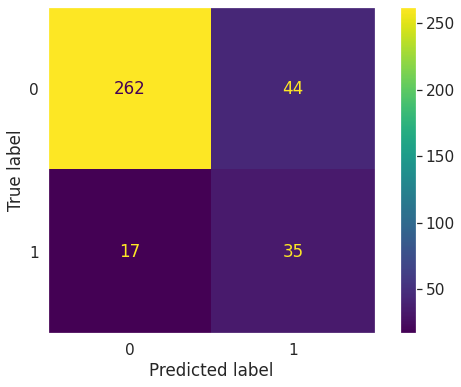


The classification report is given below:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       306
           1       0.44      0.67      0.53        52

    accuracy                           0.83       358
   macro avg       0.69      0.76      0.72       358
weighted avg       0.87      0.83      0.84       358

Recall (Sensivity): 0.67
Specificity: 0.86
Precision: 0.44
Balanced Accuracy: 0.76
F1 Score: 0.53
Profit: 66
CPU times: user 10.9 s, sys: 562 ms, total: 11.4 s
Wall time: 2min 46s


In [138]:
%%time
scores_balanced_ds, rf_bal_best_est =classGridSearchCV('underOverSampled', rfc, parameters, XtrainT, y_trainT, Xval, y_val, 'f1', scores_balanced_ds)

In [139]:
scores_balanced_ds

,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit
0,"LogisticRegression(C=50, max_iter=10000, random_state=0)",0.86,0.70,0.92,0.67,0.32,0.79,0.48,178
1,"SVC(C=10, gamma=0.1, random_state=0)",0.99,0.78,0.69,0.79,0.36,0.74,0.47,28
2,"KNeighborsClassifier(leaf_size=2, n_neighbors=1)",1.00,0.72,0.73,0.72,0.30,0.72,0.43,3
3,"DecisionTreeClassifier(max_depth=10, max_features=34, min_samples_leaf=10,\n random_state=0)",0.91,0.74,0.69,0.75,0.32,0.72,0.43,-14
4,"RandomForestClassifier(bootstrap=False, max_depth=50, max_features=2,\n n_estimators=200, random_state=0)",1.00,0.83,0.67,0.86,0.44,0.76,0.53,66


### Adaboost Classifier

In [140]:
parameters = {
    'n_estimators' : [50, 200,  400],
    'learning_rate': [0.5, 1.0, 1.5, 2.0]
}

In [141]:
ab = AdaBoostClassifier(random_state=RANDOM_STATE)

BEST PARAMS: {'learning_rate': 1.0, 'n_estimators': 50}



The model's accuracy on training is : 0.9
The model's accuracy on validation is : 0.78

The Confusion Matrix is given below:


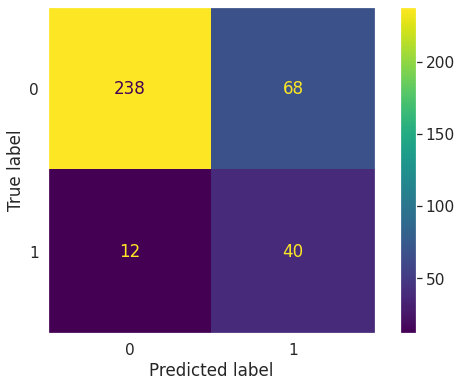


The classification report is given below:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86       306
           1       0.37      0.77      0.50        52

    accuracy                           0.78       358
   macro avg       0.66      0.77      0.68       358
weighted avg       0.87      0.78      0.80       358

Recall (Sensivity): 0.77
Specificity: 0.78
Precision: 0.37
Balanced Accuracy: 0.77
F1 Score: 0.5
Profit: 104
CPU times: user 1.25 s, sys: 44.4 ms, total: 1.29 s
Wall time: 21.2 s


In [142]:
%%time
scores_balanced_ds, ab_bal_best_est =classGridSearchCV('underOverSampled', ab, parameters, XtrainT, y_trainT, Xval, y_val, 'f1', scores_balanced_ds)

In [143]:
scores_balanced_ds

,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit
0,"LogisticRegression(C=50, max_iter=10000, random_state=0)",0.86,0.70,0.92,0.67,0.32,0.79,0.48,178
1,"SVC(C=10, gamma=0.1, random_state=0)",0.99,0.78,0.69,0.79,0.36,0.74,0.47,28
2,"KNeighborsClassifier(leaf_size=2, n_neighbors=1)",1.00,0.72,0.73,0.72,0.30,0.72,0.43,3
3,"DecisionTreeClassifier(max_depth=10, max_features=34, min_samples_leaf=10,\n random_state=0)",0.91,0.74,0.69,0.75,0.32,0.72,0.43,-14
4,"RandomForestClassifier(bootstrap=False, max_depth=50, max_features=2,\n n_estimators=200, random_state=0)",1.00,0.83,0.67,0.86,0.44,0.76,0.53,66
5,AdaBoostClassifier(random_state=0),0.90,0.78,0.77,0.78,0.37,0.77,0.50,104


### Gradient Boosting Classifier

In [144]:
parameters = dict(
    learning_rate = [0.1,  0.5, 1.5],
    n_estimators = [30,  200, 600],
    max_depth = [2, 3, 6],
    min_samples_split = [2,  10, 100],
    subsample = [0.5, 1]
    )

In [145]:
gb = GradientBoostingClassifier(random_state=RANDOM_STATE)

BEST PARAMS: {'learning_rate': 1.5, 'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 600, 'subsample': 1}



The model's accuracy on training is : 1.0
The model's accuracy on validation is : 0.82

The Confusion Matrix is given below:


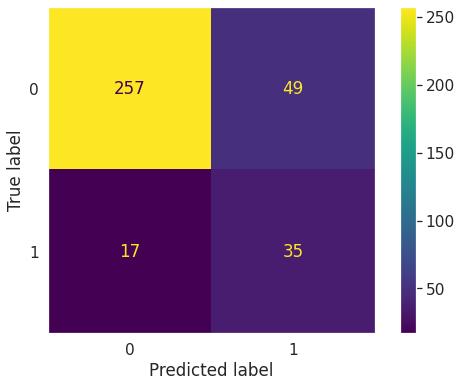


The classification report is given below:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       306
           1       0.42      0.67      0.51        52

    accuracy                           0.82       358
   macro avg       0.68      0.76      0.70       358
weighted avg       0.86      0.82      0.83       358

Recall (Sensivity): 0.67
Specificity: 0.84
Precision: 0.42
Balanced Accuracy: 0.76
F1 Score: 0.51
Profit: 51
CPU times: user 16.1 s, sys: 721 ms, total: 16.8 s
Wall time: 7min 5s


In [146]:
%%time
scores_balanced_ds, gb_bal_best_est =classGridSearchCV('underOverSampled', gb, parameters, XtrainT, y_trainT, Xval, y_val, 'f1', scores_balanced_ds)

In [147]:
scores_balanced_ds

,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit
0,"LogisticRegression(C=50, max_iter=10000, random_state=0)",0.86,0.70,0.92,0.67,0.32,0.79,0.48,178
1,"SVC(C=10, gamma=0.1, random_state=0)",0.99,0.78,0.69,0.79,0.36,0.74,0.47,28
2,"KNeighborsClassifier(leaf_size=2, n_neighbors=1)",1.00,0.72,0.73,0.72,0.30,0.72,0.43,3
3,"DecisionTreeClassifier(max_depth=10, max_features=34, min_samples_leaf=10,\n random_state=0)",0.91,0.74,0.69,0.75,0.32,0.72,0.43,-14
4,"RandomForestClassifier(bootstrap=False, max_depth=50, max_features=2,\n n_estimators=200, random_state=0)",1.00,0.83,0.67,0.86,0.44,0.76,0.53,66
5,AdaBoostClassifier(random_state=0),0.90,0.78,0.77,0.78,0.37,0.77,0.50,104
6,"GradientBoostingClassifier(learning_rate=1.5, max_depth=6, n_estimators=600,\n random_state=0, subsample=1)",1.00,0.82,0.67,0.84,0.42,0.76,0.51,51


In [148]:
scores

,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit
0,LogisticRegression(random_state=0),0.89,0.89,0.42,0.97,0.69,0.70,0.52,-118
1,"LogisticRegression(C=1, class_weight='balanced', random_state=0)",0.82,0.80,0.75,0.81,0.41,0.78,0.53,115
2,SVC(random_state=0),0.91,0.90,0.40,0.99,0.84,0.70,0.55,-122
3,"SVC(C=25, class_weight='balanced', gamma=0.001, random_state=0)",0.83,0.78,0.67,0.80,0.36,0.74,0.47,15
4,KNeighborsClassifier(),0.89,0.89,0.35,0.98,0.72,0.66,0.47,-197
5,"KNeighborsClassifier(algorithm='ball_tree', leaf_size=100, n_neighbors=1)",1.00,0.85,0.44,0.92,0.48,0.68,0.46,-141
6,DecisionTreeClassifier(random_state=0),1.00,0.83,0.42,0.90,0.42,0.66,0.42,-178
7,"DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_features=34,\n min_samples_leaf=5, min_samples_split=50,\n random_state=0)",0.84,0.78,0.69,0.79,0.36,0.74,0.47,28
8,RandomForestClassifier(random_state=0),1.00,0.89,0.35,0.98,0.72,0.66,0.47,-197
9,"RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=10,\n max_features=15, min_samples_split=100, n_estimators=200,\n random_state=0)",0.83,0.80,0.87,0.79,0.42,0.83,0.56,229


Comparing the models built using the SMOTE oversampled and randomly undersampled dataset, the tuned Logistic Regression model performed the best. The Random Forest classifier had the next highest profit score, which was lower than the score obtained using the original standardized dataset. The Adaboost classifier also had the next highest profit score and was an improvement over the Adaboost classifier's profit score obtained using the original standardized dataset.

## Create and Build Models Using PCA Dataset

In [149]:
from sklearn.decomposition import PCA

In [150]:
pca = PCA(n_components=None)

# fit the model using the training data
pca.fit(Xtrain)

PCA()

In [151]:
# transform training, validation, testing data sets using the same model parameters
X_train_pca = pca.fit(Xtrain).transform(Xtrain)

X_val_pca = pca.fit(Xval).transform(Xval)

X_test_pca = pca.fit(Xtest).transform(Xtest)

[0.32787374 0.4335255  0.50682301 0.57344997 0.62132692 0.66633941
 0.70434249 0.73792459 0.76798864 0.79456654 0.81776793 0.84030001
 0.8613324  0.88086316 0.89870727 0.91497462 0.93019854 0.94370709
 0.95606949 0.96721079 0.97658695 0.98246432 0.98801182 0.99208098
 0.99605451 0.99776433 0.99927428 0.99990586 1.         1.
 1.         1.         1.         1.         1.        ]


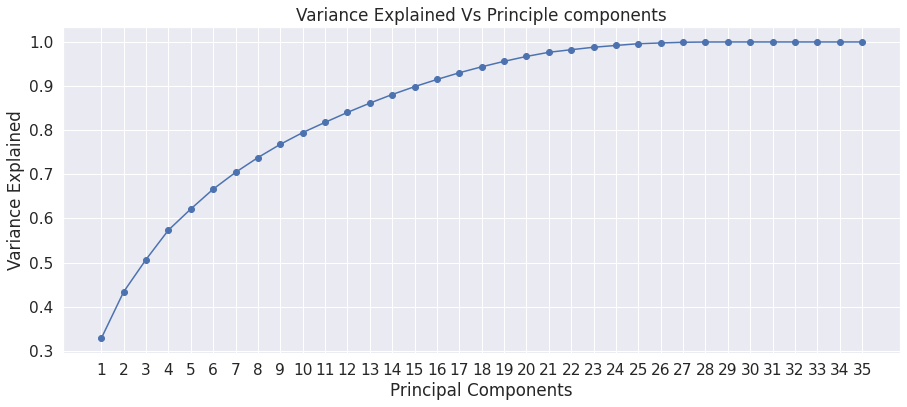

In [152]:
plt.rcParams["figure.figsize"] = (15,6)
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
plt.xticks(ticks= range(X_train_pca.shape[1]), labels=[i+1 for i in range(X_train_pca.shape[1])])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('Variance Explained Vs Principle components')
plt.show()

We selected 15 components, which comprise 90% of the variance in the data.

In [153]:
X_train_pca2 = X_train_pca[:, 0:15]
X_val_pca2 = X_val_pca[:, 0:15]
X_test_pca2 = X_test_pca[:, 0:15]

Now that we have a pca transformed data set, let's explore  the different classification algorithms with it.

### Logistic Regression

In [154]:
# Use GridSearchCV to find the **hyper parameters** for **Logistic regression**.

parameters = {
    'C': [0.1, 0.5, 1, 10, 20, 30, 50]
    #'max_iter' : [10, 100, 200, 300, 500]
} 
parameters


{'C': [0.1, 0.5, 1, 10, 20, 30, 50]}

In [155]:
lr=LogisticRegression(class_weight='balanced', random_state=RANDOM_STATE, solver='lbfgs', max_iter=10000)

BEST PARAMS: {'C': 0.1}



The model's accuracy on training is : 0.81
The model's accuracy on validation is : 0.67

The Confusion Matrix is given below:


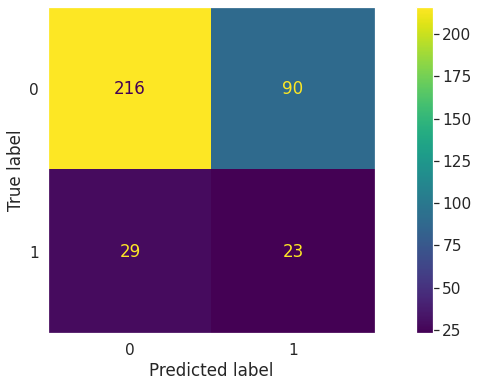


The classification report is given below:
              precision    recall  f1-score   support

           0       0.88      0.71      0.78       306
           1       0.20      0.44      0.28        52

    accuracy                           0.67       358
   macro avg       0.54      0.57      0.53       358
weighted avg       0.78      0.67      0.71       358

Recall (Sensivity): 0.44
Specificity: 0.71
Precision: 0.2
Balanced Accuracy: 0.57
F1 Score: 0.28
Profit: -336
CPU times: user 583 ms, sys: 872 ms, total: 1.46 s
Wall time: 561 ms


In [156]:
%%time
scores_PCA_ds, lr_PCA_best_est =classGridSearchCV('PCA', lr, parameters, X_train_pca2, y_train, X_val_pca2, y_val, 'f1', scores_PCA_ds)

In [157]:
scores_PCA_ds

,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit
0,"LogisticRegression(C=0.1, class_weight='balanced', max_iter=10000,\n random_state=0)",0.81,0.67,0.44,0.71,0.2,0.57,0.28,-336


### Support Vector Machines Classifier

In [158]:
parameters = {
     'C': [1, 10, 25, 100, 300],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale']   
}
parameters

{'C': [1, 10, 25, 100, 300], 'gamma': [0.001, 0.01, 0.1, 1, 'scale']}

In [159]:
svc = SVC(kernel = 'rbf', class_weight='balanced', random_state=RANDOM_STATE)

BEST PARAMS: {'C': 1, 'gamma': 0.01}



The model's accuracy on training is : 0.81
The model's accuracy on validation is : 0.68

The Confusion Matrix is given below:


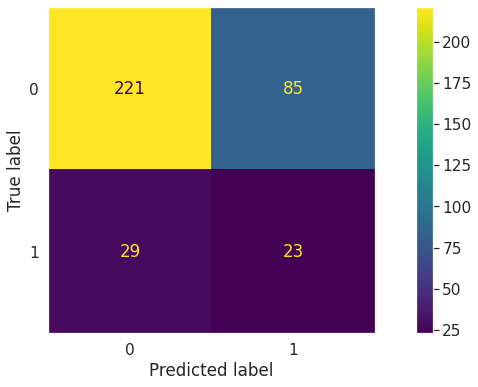


The classification report is given below:
              precision    recall  f1-score   support

           0       0.88      0.72      0.79       306
           1       0.21      0.44      0.29        52

    accuracy                           0.68       358
   macro avg       0.55      0.58      0.54       358
weighted avg       0.79      0.68      0.72       358

Recall (Sensivity): 0.44
Specificity: 0.72
Precision: 0.21
Balanced Accuracy: 0.58
F1 Score: 0.29
Profit: -321
CPU times: user 1.2 s, sys: 34.9 ms, total: 1.24 s
Wall time: 5.29 s


In [160]:
%%time
scores_PCA_ds, svc_PCA_best_est =classGridSearchCV('PCA', svc, parameters, X_train_pca2, y_train, X_val_pca2, y_val, 'f1', scores_PCA_ds)

In [161]:
scores_PCA_ds

,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit
0,"LogisticRegression(C=0.1, class_weight='balanced', max_iter=10000,\n random_state=0)",0.81,0.67,0.44,0.71,0.20,0.57,0.28,-336
1,"SVC(C=1, class_weight='balanced', gamma=0.01, random_state=0)",0.81,0.68,0.44,0.72,0.21,0.58,0.29,-321


### KNN Classifier

In [162]:
parameters = {
    'n_neighbors': [1, 3, 5, 10],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : [2, 5,  50, 100, 200]
}

In [163]:
knc = KNeighborsClassifier()

BEST PARAMS: {'algorithm': 'auto', 'leaf_size': 2, 'n_neighbors': 1, 'weights': 'uniform'}



The model's accuracy on training is : 1.0
The model's accuracy on validation is : 0.81

The Confusion Matrix is given below:


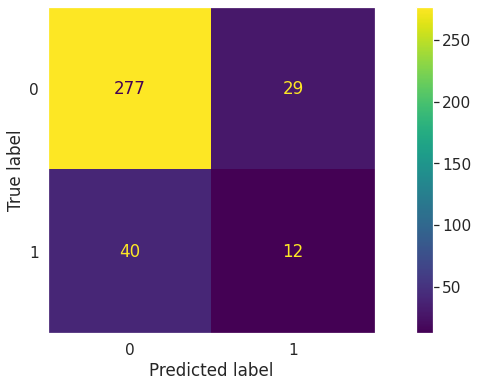


The classification report is given below:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       306
           1       0.29      0.23      0.26        52

    accuracy                           0.81       358
   macro avg       0.58      0.57      0.57       358
weighted avg       0.79      0.81      0.80       358

Recall (Sensivity): 0.23
Specificity: 0.91
Precision: 0.29
Balanced Accuracy: 0.57
F1 Score: 0.26
Profit: -395
CPU times: user 2.66 s, sys: 85.5 ms, total: 2.74 s
Wall time: 4.06 s


In [164]:
%%time
scores_PCA_ds, knc_PCA_best_est =classGridSearchCV('PCA', knc, parameters, X_train_pca2, y_train, X_val_pca2, y_val, 'f1', scores_PCA_ds)

In [165]:
scores_PCA_ds

,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit
0,"LogisticRegression(C=0.1, class_weight='balanced', max_iter=10000,\n random_state=0)",0.81,0.67,0.44,0.71,0.20,0.57,0.28,-336
1,"SVC(C=1, class_weight='balanced', gamma=0.01, random_state=0)",0.81,0.68,0.44,0.72,0.21,0.58,0.29,-321
2,"KNeighborsClassifier(leaf_size=2, n_neighbors=1)",1.00,0.81,0.23,0.91,0.29,0.57,0.26,-395


### Decision Tree Classifier

In [166]:
parameters = {
    'max_depth': [2,  500, 1000],
    'min_samples_split' : [2, 50, 300],
    'min_samples_leaf' : [2, 50, 300]
}
parameters

{'max_depth': [2, 500, 1000],
 'min_samples_leaf': [2, 50, 300],
 'min_samples_split': [2, 50, 300]}

In [167]:
dt = DecisionTreeClassifier(class_weight='balanced', max_features=15, random_state=RANDOM_STATE)

BEST PARAMS: {'max_depth': 500, 'min_samples_leaf': 50, 'min_samples_split': 2}



The model's accuracy on training is : 0.77
The model's accuracy on validation is : 0.6

The Confusion Matrix is given below:


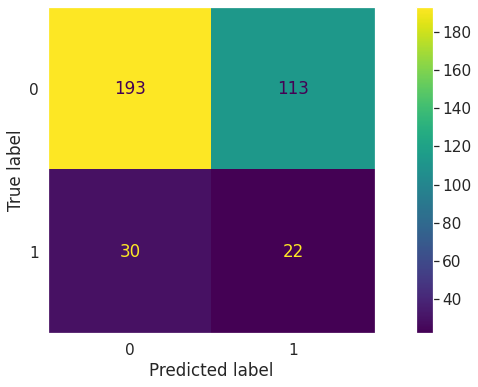


The classification report is given below:
              precision    recall  f1-score   support

           0       0.87      0.63      0.73       306
           1       0.16      0.42      0.24        52

    accuracy                           0.60       358
   macro avg       0.51      0.53      0.48       358
weighted avg       0.76      0.60      0.66       358

Recall (Sensivity): 0.42
Specificity: 0.63
Precision: 0.16
Balanced Accuracy: 0.53
F1 Score: 0.24
Profit: -427
CPU times: user 724 ms, sys: 27.5 ms, total: 751 ms
Wall time: 995 ms


In [168]:
%%time
scores_PCA_ds, dt_bal_best_est =classGridSearchCV('PCA', dt, parameters, X_train_pca2, y_train, X_val_pca2, y_val, 'f1', scores_PCA_ds)

In [169]:
scores_PCA_ds

,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit
0,"LogisticRegression(C=0.1, class_weight='balanced', max_iter=10000,\n random_state=0)",0.81,0.67,0.44,0.71,0.20,0.57,0.28,-336
1,"SVC(C=1, class_weight='balanced', gamma=0.01, random_state=0)",0.81,0.68,0.44,0.72,0.21,0.58,0.29,-321
2,"KNeighborsClassifier(leaf_size=2, n_neighbors=1)",1.00,0.81,0.23,0.91,0.29,0.57,0.26,-395
3,"DecisionTreeClassifier(class_weight='balanced', max_depth=500, max_features=15,\n min_samples_leaf=50, random_state=0)",0.77,0.60,0.42,0.63,0.16,0.53,0.24,-427


### Random Forest Classifier

In [170]:
parameters = {
    'n_estimators' : [50,  150, 200],
    'max_depth': [1,  50, 100],
    'min_samples_split' : [2, 100, 300],
    #'max_features': [2, 15,  34],
    'bootstrap': [True, False]
}

In [171]:
rfc = RandomForestClassifier(class_weight='balanced', random_state=RANDOM_STATE, max_features=15)

BEST PARAMS: {'bootstrap': True, 'max_depth': 50, 'min_samples_split': 100, 'n_estimators': 50}



The model's accuracy on training is : 0.81
The model's accuracy on validation is : 0.67

The Confusion Matrix is given below:


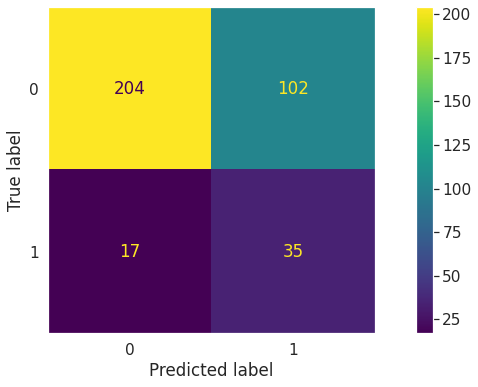


The classification report is given below:
              precision    recall  f1-score   support

           0       0.92      0.67      0.77       306
           1       0.26      0.67      0.37        52

    accuracy                           0.67       358
   macro avg       0.59      0.67      0.57       358
weighted avg       0.83      0.67      0.72       358

Recall (Sensivity): 0.67
Specificity: 0.67
Precision: 0.26
Balanced Accuracy: 0.67
F1 Score: 0.37
Profit: -108
CPU times: user 3.99 s, sys: 204 ms, total: 4.2 s
Wall time: 1min 57s


In [172]:
%%time
scores_PCA_ds, rf_PCA_best_est =classGridSearchCV('PCA', rfc, parameters, X_train_pca2, y_train, X_val_pca2, y_val, 'f1', scores_PCA_ds)

In [173]:
scores_PCA_ds

,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit
0,"LogisticRegression(C=0.1, class_weight='balanced', max_iter=10000,\n random_state=0)",0.81,0.67,0.44,0.71,0.20,0.57,0.28,-336
1,"SVC(C=1, class_weight='balanced', gamma=0.01, random_state=0)",0.81,0.68,0.44,0.72,0.21,0.58,0.29,-321
2,"KNeighborsClassifier(leaf_size=2, n_neighbors=1)",1.00,0.81,0.23,0.91,0.29,0.57,0.26,-395
3,"DecisionTreeClassifier(class_weight='balanced', max_depth=500, max_features=15,\n min_samples_leaf=50, random_state=0)",0.77,0.60,0.42,0.63,0.16,0.53,0.24,-427
4,"RandomForestClassifier(class_weight='balanced', max_depth=50, max_features=15,\n min_samples_split=100, n_estimators=50, random_state=0)",0.81,0.67,0.67,0.67,0.26,0.67,0.37,-108


### Adaboost Classifier

In [174]:
parameters = {
    'n_estimators' : [50,  250,  400],
    'learning_rate': [0.5, 1.0, 1.5, 2.0]
}

In [175]:
ab = AdaBoostClassifier(random_state=RANDOM_STATE)

BEST PARAMS: {'learning_rate': 0.5, 'n_estimators': 250}



The model's accuracy on training is : 0.93
The model's accuracy on validation is : 0.78

The Confusion Matrix is given below:


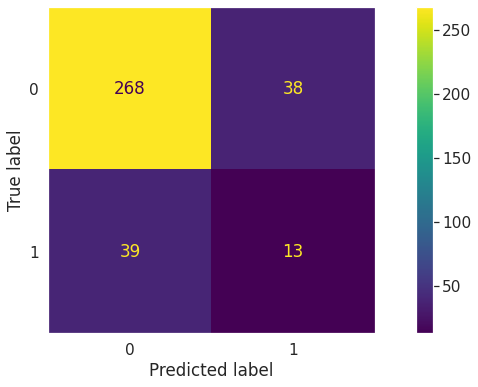


The classification report is given below:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       306
           1       0.25      0.25      0.25        52

    accuracy                           0.78       358
   macro avg       0.56      0.56      0.56       358
weighted avg       0.78      0.78      0.78       358

Recall (Sensivity): 0.25
Specificity: 0.88
Precision: 0.25
Balanced Accuracy: 0.56
F1 Score: 0.25
Profit: -400
CPU times: user 2.27 s, sys: 51.6 ms, total: 2.33 s
Wall time: 25.7 s


In [176]:
%%time
scores_PCA_ds, ab_pca_best_est =classGridSearchCV('PCA', ab, parameters, X_train_pca2, y_train, X_val_pca2, y_val, 'f1', scores_PCA_ds)

In [177]:
scores_PCA_ds

,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit
0,"LogisticRegression(C=0.1, class_weight='balanced', max_iter=10000,\n random_state=0)",0.81,0.67,0.44,0.71,0.20,0.57,0.28,-336
1,"SVC(C=1, class_weight='balanced', gamma=0.01, random_state=0)",0.81,0.68,0.44,0.72,0.21,0.58,0.29,-321
2,"KNeighborsClassifier(leaf_size=2, n_neighbors=1)",1.00,0.81,0.23,0.91,0.29,0.57,0.26,-395
3,"DecisionTreeClassifier(class_weight='balanced', max_depth=500, max_features=15,\n min_samples_leaf=50, random_state=0)",0.77,0.60,0.42,0.63,0.16,0.53,0.24,-427
4,"RandomForestClassifier(class_weight='balanced', max_depth=50, max_features=15,\n min_samples_split=100, n_estimators=50, random_state=0)",0.81,0.67,0.67,0.67,0.26,0.67,0.37,-108
5,"AdaBoostClassifier(learning_rate=0.5, n_estimators=250, random_state=0)",0.93,0.78,0.25,0.88,0.25,0.56,0.25,-400


### Gradient Boosting Classifier

In [178]:
parameters = dict(
    learning_rate = [0.1, 0.5,  1.5],
    n_estimators = [30,  100,  200],
    max_depth = [2,  4, 6],
    min_samples_split = [2,  10,  100],
    subsample = [0.5, 1]
    )

In [179]:
gb = GradientBoostingClassifier(random_state=RANDOM_STATE, max_features=15)

BEST PARAMS: {'learning_rate': 0.5, 'max_depth': 6, 'min_samples_split': 100, 'n_estimators': 200, 'subsample': 1}



The model's accuracy on training is : 1.0
The model's accuracy on validation is : 0.8

The Confusion Matrix is given below:


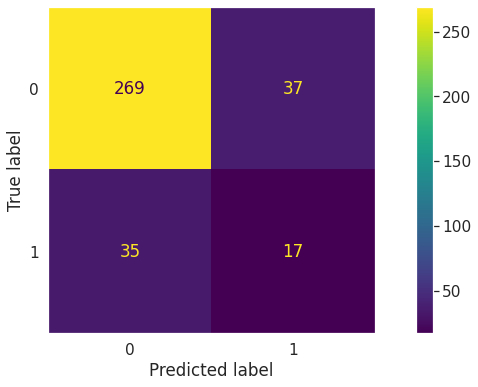


The classification report is given below:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       306
           1       0.31      0.33      0.32        52

    accuracy                           0.80       358
   macro avg       0.60      0.60      0.60       358
weighted avg       0.80      0.80      0.80       358

Recall (Sensivity): 0.33
Specificity: 0.88
Precision: 0.31
Balanced Accuracy: 0.6
F1 Score: 0.32
Profit: -309
CPU times: user 11.7 s, sys: 438 ms, total: 12.2 s
Wall time: 3min 41s


In [180]:
%%time
scores_PCA_ds, gb_pca_best_est =classGridSearchCV('PCA', gb, parameters, X_train_pca2, y_train, X_val_pca2, y_val, 'f1', scores_PCA_ds)

The PCA results were disappointing as neither of the classification models improved using the transformed PCA data set. 

A data frame of classification models built using the transformed PCA data:

In [181]:
scores_PCA_ds

,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit
0,"LogisticRegression(C=0.1, class_weight='balanced', max_iter=10000,\n random_state=0)",0.81,0.67,0.44,0.71,0.20,0.57,0.28,-336
1,"SVC(C=1, class_weight='balanced', gamma=0.01, random_state=0)",0.81,0.68,0.44,0.72,0.21,0.58,0.29,-321
2,"KNeighborsClassifier(leaf_size=2, n_neighbors=1)",1.00,0.81,0.23,0.91,0.29,0.57,0.26,-395
3,"DecisionTreeClassifier(class_weight='balanced', max_depth=500, max_features=15,\n min_samples_leaf=50, random_state=0)",0.77,0.60,0.42,0.63,0.16,0.53,0.24,-427
4,"RandomForestClassifier(class_weight='balanced', max_depth=50, max_features=15,\n min_samples_split=100, n_estimators=50, random_state=0)",0.81,0.67,0.67,0.67,0.26,0.67,0.37,-108
5,"AdaBoostClassifier(learning_rate=0.5, n_estimators=250, random_state=0)",0.93,0.78,0.25,0.88,0.25,0.56,0.25,-400
6,"GradientBoostingClassifier(learning_rate=0.5, max_depth=6, max_features=15,\n min_samples_split=100, n_estimators=200,\n random_state=0, subsample=1)",1.00,0.80,0.33,0.88,0.31,0.60,0.32,-309


We created a new column, which is the difference between training and validation accuracy and this column will be used to determine how large each model is over fitting the training data set. 

In [182]:
scores_PCA_ds['Differencebtn_trainAcc&ValAcc'] = scores_PCA_ds['train acc.'] - scores_PCA_ds['val acc.']
scores_PCA_ds

,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit,Differencebtn_trainAcc&ValAcc
0,"LogisticRegression(C=0.1, class_weight='balanced', max_iter=10000,\n random_state=0)",0.81,0.67,0.44,0.71,0.20,0.57,0.28,-336,0.14
1,"SVC(C=1, class_weight='balanced', gamma=0.01, random_state=0)",0.81,0.68,0.44,0.72,0.21,0.58,0.29,-321,0.13
2,"KNeighborsClassifier(leaf_size=2, n_neighbors=1)",1.00,0.81,0.23,0.91,0.29,0.57,0.26,-395,0.19
3,"DecisionTreeClassifier(class_weight='balanced', max_depth=500, max_features=15,\n min_samples_leaf=50, random_state=0)",0.77,0.60,0.42,0.63,0.16,0.53,0.24,-427,0.17
4,"RandomForestClassifier(class_weight='balanced', max_depth=50, max_features=15,\n min_samples_split=100, n_estimators=50, random_state=0)",0.81,0.67,0.67,0.67,0.26,0.67,0.37,-108,0.14
5,"AdaBoostClassifier(learning_rate=0.5, n_estimators=250, random_state=0)",0.93,0.78,0.25,0.88,0.25,0.56,0.25,-400,0.15
6,"GradientBoostingClassifier(learning_rate=0.5, max_depth=6, max_features=15,\n min_samples_split=100, n_estimators=200,\n random_state=0, subsample=1)",1.00,0.80,0.33,0.88,0.31,0.60,0.32,-309,0.20


A data frame of classification models built using the standardized data:

In [183]:
scores

,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit
0,LogisticRegression(random_state=0),0.89,0.89,0.42,0.97,0.69,0.70,0.52,-118
1,"LogisticRegression(C=1, class_weight='balanced', random_state=0)",0.82,0.80,0.75,0.81,0.41,0.78,0.53,115
2,SVC(random_state=0),0.91,0.90,0.40,0.99,0.84,0.70,0.55,-122
3,"SVC(C=25, class_weight='balanced', gamma=0.001, random_state=0)",0.83,0.78,0.67,0.80,0.36,0.74,0.47,15
4,KNeighborsClassifier(),0.89,0.89,0.35,0.98,0.72,0.66,0.47,-197
5,"KNeighborsClassifier(algorithm='ball_tree', leaf_size=100, n_neighbors=1)",1.00,0.85,0.44,0.92,0.48,0.68,0.46,-141
6,DecisionTreeClassifier(random_state=0),1.00,0.83,0.42,0.90,0.42,0.66,0.42,-178
7,"DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_features=34,\n min_samples_leaf=5, min_samples_split=50,\n random_state=0)",0.84,0.78,0.69,0.79,0.36,0.74,0.47,28
8,RandomForestClassifier(random_state=0),1.00,0.89,0.35,0.98,0.72,0.66,0.47,-197
9,"RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=10,\n max_features=15, min_samples_split=100, n_estimators=200,\n random_state=0)",0.83,0.80,0.87,0.79,0.42,0.83,0.56,229


let's create a new column, which is a difference between training and validation accuracy and this column will be used to determine how large each model is over fitting the training data set.

In [184]:
scores['Differencebtn_trainAcc&ValAcc'] = scores['train acc.'] - scores['val acc.']
scores

,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit,Differencebtn_trainAcc&ValAcc
0,LogisticRegression(random_state=0),0.89,0.89,0.42,0.97,0.69,0.70,0.52,-118,0.00
1,"LogisticRegression(C=1, class_weight='balanced', random_state=0)",0.82,0.80,0.75,0.81,0.41,0.78,0.53,115,0.02
2,SVC(random_state=0),0.91,0.90,0.40,0.99,0.84,0.70,0.55,-122,0.01
3,"SVC(C=25, class_weight='balanced', gamma=0.001, random_state=0)",0.83,0.78,0.67,0.80,0.36,0.74,0.47,15,0.05
4,KNeighborsClassifier(),0.89,0.89,0.35,0.98,0.72,0.66,0.47,-197,0.00
5,"KNeighborsClassifier(algorithm='ball_tree', leaf_size=100, n_neighbors=1)",1.00,0.85,0.44,0.92,0.48,0.68,0.46,-141,0.15
6,DecisionTreeClassifier(random_state=0),1.00,0.83,0.42,0.90,0.42,0.66,0.42,-178,0.17
7,"DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_features=34,\n min_samples_leaf=5, min_samples_split=50,\n random_state=0)",0.84,0.78,0.69,0.79,0.36,0.74,0.47,28,0.06
8,RandomForestClassifier(random_state=0),1.00,0.89,0.35,0.98,0.72,0.66,0.47,-197,0.11
9,"RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=10,\n max_features=15, min_samples_split=100, n_estimators=200,\n random_state=0)",0.83,0.80,0.87,0.79,0.42,0.83,0.56,229,0.03


Based on the profit, the tuned Random Forest classifier is the best model for the original standardized dataset. 

A data frame of classification models built on a balanced data set derived through the use of the SMOTE package:

In [185]:
scores_balanced_ds

,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit
0,"LogisticRegression(C=50, max_iter=10000, random_state=0)",0.86,0.70,0.92,0.67,0.32,0.79,0.48,178
1,"SVC(C=10, gamma=0.1, random_state=0)",0.99,0.78,0.69,0.79,0.36,0.74,0.47,28
2,"KNeighborsClassifier(leaf_size=2, n_neighbors=1)",1.00,0.72,0.73,0.72,0.30,0.72,0.43,3
3,"DecisionTreeClassifier(max_depth=10, max_features=34, min_samples_leaf=10,\n random_state=0)",0.91,0.74,0.69,0.75,0.32,0.72,0.43,-14
4,"RandomForestClassifier(bootstrap=False, max_depth=50, max_features=2,\n n_estimators=200, random_state=0)",1.00,0.83,0.67,0.86,0.44,0.76,0.53,66
5,AdaBoostClassifier(random_state=0),0.90,0.78,0.77,0.78,0.37,0.77,0.50,104
6,"GradientBoostingClassifier(learning_rate=1.5, max_depth=6, n_estimators=600,\n random_state=0, subsample=1)",1.00,0.82,0.67,0.84,0.42,0.76,0.51,51


The next best model, obtained using the SMOTE transformed dataset is the tuned Logistic Regression classifier. 

Add in the new column, which is a difference between training and validation accuracy. This column will be used to determine how large each model is over fitting the training data set.

In [186]:
scores_balanced_ds['Differencebtn_trainAcc&ValAcc'] = scores_balanced_ds['train acc.'] - scores_balanced_ds['val acc.']
scores_balanced_ds

,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit,Differencebtn_trainAcc&ValAcc
0,"LogisticRegression(C=50, max_iter=10000, random_state=0)",0.86,0.70,0.92,0.67,0.32,0.79,0.48,178,0.16
1,"SVC(C=10, gamma=0.1, random_state=0)",0.99,0.78,0.69,0.79,0.36,0.74,0.47,28,0.21
2,"KNeighborsClassifier(leaf_size=2, n_neighbors=1)",1.00,0.72,0.73,0.72,0.30,0.72,0.43,3,0.28
3,"DecisionTreeClassifier(max_depth=10, max_features=34, min_samples_leaf=10,\n random_state=0)",0.91,0.74,0.69,0.75,0.32,0.72,0.43,-14,0.17
4,"RandomForestClassifier(bootstrap=False, max_depth=50, max_features=2,\n n_estimators=200, random_state=0)",1.00,0.83,0.67,0.86,0.44,0.76,0.53,66,0.17
5,AdaBoostClassifier(random_state=0),0.90,0.78,0.77,0.78,0.37,0.77,0.50,104,0.12
6,"GradientBoostingClassifier(learning_rate=1.5, max_depth=6, n_estimators=600,\n random_state=0, subsample=1)",1.00,0.82,0.67,0.84,0.42,0.76,0.51,51,0.18


The best two classifiers are below:

In [187]:
listOfFrames= [scores.filter(items=[9], axis=0), scores_balanced_ds.filter(items=[0], axis=0)]
result = pd.concat(listOfFrames)
result

,model,train acc.,val acc.,recall,specificity,precision,bal acc.,F1,profit,Differencebtn_trainAcc&ValAcc
9,"RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=10,\n max_features=15, min_samples_split=100, n_estimators=200,\n random_state=0)",0.83,0.8,0.87,0.79,0.42,0.83,0.56,229,0.03
0,"LogisticRegression(C=50, max_iter=10000, random_state=0)",0.86,0.7,0.92,0.67,0.32,0.79,0.48,178,0.16


We selected these two classifers based on the profit, F1 Score, balanced accuracy, recall, specificity and the difference between the values of training and validation accuracy. We see that the Random Forest classifier optimized with GridSearchCV and built with the original standardized dataset has a smaller difference in training to validation accuracy, at 0.03, compared to the difference in training and validation scores for the tuned Logistic Regression classifier, at 0.15.

# Evaluation of two best models on Test Data

## Predict the accuracy on the testing data set using the best models:

In [188]:
# We initilalize a list of best two classifiers tested on the testing data set.
best_two_classifiers_on_Test=[]



*   First, using logistic Regression model derived using the under-sampled, over-sampled data set through the use of the SMOTE package:



In [189]:
# predict the accuracy on the testing data set
y_pred_test = lr_bal_best_est.predict(Xtest)


The Confusion Matrix is given below:


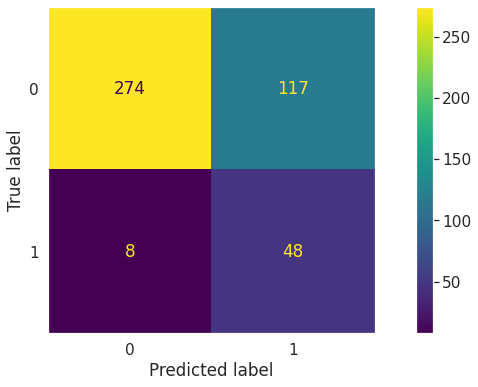


The classification report is given below:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81       391
           1       0.29      0.86      0.43        56

    accuracy                           0.72       447
   macro avg       0.63      0.78      0.62       447
weighted avg       0.89      0.72      0.77       447

Recall (Sensivity): 0.86
Specificity: 0.7
Precision: 0.29
Balanced Accuracy: 0.78
F1 Score: 0.43
Profit: 89


In [190]:
# A helper function that returns the metrics on the testing data set, prints a confusion matrix and also returns back a list of all the metrics. 
best_two_classifiers_on_Test.append(deriveMetricsOnTest(lr_bal_best_est, y_pred_test))



*   Second, using a Random Forest Classifier optimized with GridSearchCV:



In [191]:
# predict the accuracy on the testing data set
y_pred_test = rf_best_est.predict(Xtest)


The Confusion Matrix is given below:


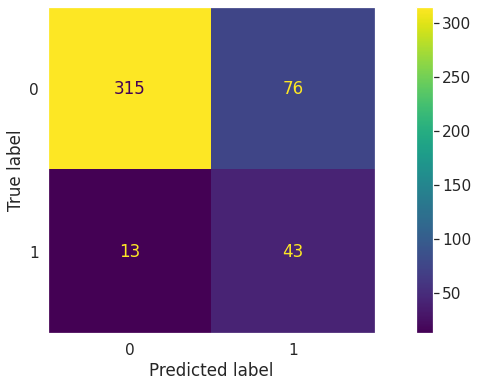


The classification report is given below:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       391
           1       0.36      0.77      0.49        56

    accuracy                           0.80       447
   macro avg       0.66      0.79      0.68       447
weighted avg       0.89      0.80      0.83       447

Recall (Sensivity): 0.77
Specificity: 0.81
Precision: 0.36
Balanced Accuracy: 0.79
F1 Score: 0.49
Profit: 102


In [192]:
# A helper function that returns the metrics on the testing data set, prints a confusion matrix and also returns back a list of all the metrics. 
best_two_classifiers_on_Test.append(deriveMetricsOnTest(rf_best_est, y_pred_test))

In [193]:
# let's look at the contents of the populated list
best_two_classifiers_on_Test

[['LogisticRegression(C=50, max_iter=10000, random_state=0)',
  0.72,
  0.86,
  0.7,
  0.29,
  0.78,
  0.43,
  89],
 ["RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=10,\n                       max_features=15, min_samples_split=100, n_estimators=200,\n                       random_state=0)",
  0.8,
  0.77,
  0.81,
  0.36,
  0.79,
  0.49,
  102]]

In [194]:
# let's derive a data frame
df_classifiers_test = pd.DataFrame(data=best_two_classifiers_on_Test, columns=['Model', 'AccuracyOnTest', 'RecallOnTest', 'SpecificityOnTest', 'PrecisionOnTest', 'BalancedAccuracyOnTest', 'F1ScoreOnTest','Profit'])
df_classifiers_test # displaying the contents of the data frame


,Model,AccuracyOnTest,RecallOnTest,SpecificityOnTest,PrecisionOnTest,BalancedAccuracyOnTest,F1ScoreOnTest,Profit
0,"LogisticRegression(C=50, max_iter=10000, random_state=0)",0.72,0.86,0.70,0.29,0.78,0.43,89
1,"RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=10,\n max_features=15, min_samples_split=100, n_estimators=200,\n random_state=0)",0.80,0.77,0.81,0.36,0.79,0.49,102


## Conclusion

Similar to the results achieved using the training and validation data, the Random Forest classifier performed better on the test data compared to the Logistic Regression, producing a profit of 102 dollars, compared to 89 dollars for the Logistic Regression classifier. Although the Logistic Regression classifier had a higher recall score, the Random Forest Classifier also had a higher test accuracy, specificity, precision, balanced accuracy and F1 score.

With more time, we would explore the different regression algorithms to predict the customers' amount of purchases or income. The insights obtained through this project will be helpful in maximizing the cost-efficiency and effectiveness of a marketing campaign by targeting customers who are more likely to accept the campaign.